# **Medical Examination and Treatment System in Civil Hospitals**



# **1. Team information**
| Student               | Student ID| Platoon 1 | Platoon 2 | Platoon 3 | Contribution |
|-----------------------|-----------|-----------|-----------|-----------|-----------|
| Lê Văn Phúc           | 2152241   |  yes      |           |  yes      | 100 % |
| Nguyễn Khánh Nam      | 2153599   |  yes      |           |           | 100 % |
| Trần Minh Tuấn        | 2152336   |  yes      |           |           | 100 % |
| Nguyễn Văn Thành Đạt  | 2152055   |           | yes       |           | 100 % |
| Vũ Nam Bình           | 2152441   |           | yes       |           | 100 % |
| Nguyễn Quang Thiện    | 2152994   |           |           |  yes      | 100 % |
| Lê Minh Nhật          | 1952375   |           | yes       |           | 100 % |

# **2. System design**

<div style="display: flex; justify-content: center; gap: 20px;">
  <figure style="display: flex; flex-direction: column; align-items: center;">
    <img src="https://github.com/knammm/CloudFormation-Demo/blob/main/HospitalSystem-Test.drawio.png?raw=true" width="1100">
    <figcaption style="text-align: center; margin-top: 10px;">Figure 1: System Design</figcaption>
  </figure>
  <figure style="display: flex; flex-direction: column; align-items: center;">
    <img src="https://github.com/knammm/CloudFormation-Demo/blob/main/HospitalSystem-Activity%20Diagram.drawio.png?raw=true" width="1100">
    <figcaption style="text-align: center; margin-top: 10px;">Figure 2: System Activity Diagram</figcaption>
  </figure>
</div>




## System Description
- The system outlined represents the patient management process in a healthcare facility, illustrating both non-urgent and urgent patient flow through various stages. It depicts the complete journey, starting from patient arrival, moving through the check-in, medical consultation, and ending at pharmacy and payment. This process helps ensure efficient resource utilization while providing necessary healthcare services based on the urgency of each case.

###2.1. Arrival:

  Patients enter the healthcare facility under two scenarios, each with distinct pathways:
  - **Non-Urgent Patients (Probability p01)**: These patients require standard healthcare services. They proceed to the check-in stage.
  - **Urgent Patients (Probability p02)**: These patients arrive with critical conditions, typically by ambulance, and are directed immediately to the emergency care stage.
  
###2.2. Check-In Process (Non-Urgent Patients) (M/M/C):

  Patients categorized as non-urgent follow this process:
  - Check-In: Upon arrival, non-urgent patients are required to check in at registration desks or kiosks.
  - Output:
    + If the patients don’t provide enough information(Probability p10), they may be asked to exit the system.
    + Successfully registered patients are then directed to one of three departments based on the nature of their medical needs:
      + Digestive Department (Probability p13)
      + Neurology Department (Probability p14)
      + Injury Department (Probability p15)

###2.3. Emergency Care Process (Urgent Patients)(M/M/1 or M/M/C):

- This process is M/M/1 or M/M/C depending on the scenario.
- Patients categorized as urgent, requiring immediate medical attention, follow this route:
  - Emergency Care: Upon arrival, patients receive stabilization care in the emergency room. This process may involve emergency treatments and necessary tests to assess and stabilize the patient's condition.
  - Output:
    + If the patient's condition is stabilized, they are moved to the Urgent Care Consultation stage(with probability of p26).
    + If the patient's condition is too critical and the facility cannot provide the required care (with probability of p20), they are transferred to another hospital for further treatment.

###2.4. Doctor Consultation and Diagnosis (Non-Urgent Patients) (M/M/1 or M/M/C):

- The Digestive and Neurology is always M/M/C because the arrival rate of these 2 departments are higher. And the Injury can be M/M/C or M/M/1 depending on the scenario.
- After successfully navigating through the check-in process, non-urgent patients receive consultation and diagnosis according to their condition.
  + Departments: Patients are assigned to the relevant department, such as Digestive, Neurology, or Injury, where they receive detailed medical consultation. The number of clinics in each department is as follows: Digestion - 3, Neurology - 2, and Injury - 1.
  + Output: Once diagnosed and treated, patients proceed to the Pharmacy and Payment stage.

###2.5. Urgent Care Consultation (Urgent Patients)(M/M/1or M/M/C):

- This process is M/M/1 or M/M/C depending on the scenario.
- Following stabilization in the emergency care process, urgent patients receive detailed consultations.
  + Consultation Process: In this stage, healthcare professionals provide thorough consultation, and follow-up based on the patient’s condition after they have received the emergency care previously.
  + Output: Following the consultation, patients proceed to the Pharmacy and Payment stage.

###2.6. Pharmacy and Payment (M/M/C):

- After the consultation, both non-urgent and urgent patients are directed to the Pharmacy and Payment stage.
- Process:
  + Patients receive the necessary documents, prescriptions, and medications.
  + Payment is processed, and a receipt is provided.
- Output:
  + Patients may either be admitted to the hospital for further care or exit the system and return home

## **3. System Performance Evaluation Steps**

###3.1.Define Goals and System:

- **Define Goals**: The primary goal is to analyze how patient arrival rate impacts the overall patient experience, specifically focusing on response time, waiting time, and system utilization. Furthermore, we suggest a number of servers at each node to avoid bottlenecks.
- **System Boundaries**:
  + Registration for Non-Urgent Patients: This involves taking information during the check-in process for non-urgent patients.
  + Emergency Consultation: Includes diagnostic services provided to both non-urgent and urgent patients.
  + Emergency Room: A dedicated facility for patients needing immediate, urgent medical attention.
  + Digestive Department: Handles patients with digestive system issues.
  + Neurology Department: Treats patients with neurological conditions.
  + Injury Department: Manages patients with injury-related problems.
  + Pharmacy and Payment: The final stage where patients collect prescribed medications and complete their payments before exiting the healthcare system.

###3.2. Service and Outcomes
- **Patient Registration and Information Collection**
  + Process: Patients fill in the required information, receive initial diagnostics, and are directed to the appropriate department.
  + Possible Outcomes:
    + Digestive Department: Patients are diagnosed with digestive system issues.
    + Neurology Department: Patients are diagnosed with neurological issues.
    + Injury Department: Patients are diagnosed with injury-related problems.
    + Not Verified Successfully: Patients do not have sufficient or necessary documentation.
- **Doctor Consultation and Diagnosis (Non-Urgent Patients)**
  + Process: Medical examination and treatment are provided for non-urgent patients.
  + Possible Outcomes:
    + Patients are completely treated and fully recovered.
- **Emergency Care (Urgent Patients)**
  + Process: Patients are admitted to the emergency room for immediate procedures aimed at stabilizing their condition and eliminating their illness.
  + Possible Outcomes:
    + Patients are successfully treated and recovered.
    + Patients are transferred to another hospital for further care.
- **Urgent Care Consultation**
  + Process: After emergency treatment, patients receive detailed consultation from healthcare professionals.
  + Possible Outcomes:
    + Patients receive medical feedback and guidance from doctors.
- **Pharmacy and Payment**
  + Process: Patients receive prescribed medications and complete any necessary payments.
  + Possible Outcomes:
    + Patients collect medications (if needed) and make their payment.

###3.3. Select Metrics
- Done Correctly
  + Patient Response Metrics:
    + Average Patient Response Time: Measures the time taken for patients to receive the intended healthcare services.
    + Average Patient Waiting Time: The mean time patients spend waiting before receiving a service.
  + Processing Speed Metrics:
    + Processing Speed is measured as the number of patients that have been processed per time unit at each respective process.
    + For each stage, including check-in, consultation room, digestive, injury, neurology examination rooms, emergency care, urgent care consultation, and pharmacy & payment desk.
  + Average Processing Time Metrics:
    + Average Processing Time is measured as the average time a patient spends completing the respective process.
    + For each examination room, check-in desk, emergency care, urgent care consultation, and pharmacy.
  + Average Waiting Time Metrics:
    + Average Waiting Time represents how long patients have to wait before entering each respective stage.
    + For each queue, such as check-in desk, digestive, injury, neurology examination rooms, emergency care, urgent care consultation, and pharmacy & payment desk.
  + Utilization Efficiency Metrics:
    + Utilization Efficiency is calculated by comparing the time servers are in use against the total available simulation time.
    + For each stage, such as check-in, digestive, injury, neurology examination rooms, emergency care, urgent care consultation and pharmacy & payment desk.
  + Success Rates:
    + Success Rate at Check-in Desks: Ratio of patients successfully checked in versus total patients attempting to check in.
    + Success Rate in Emergency Rooms: Ratio of patients successfully treated versus total patients needing emergency care.
- Done Incorrectly
  + Exit Rate: Rate at which patients leave the system prematurely.

###3.4. List System Parameters
- System Parameters:
  + Number of Servers:
    + Check-in Desk
    + Digest Department
    + Neurology Department
    + Injury Department
    + Emergency Department
    + Emergency Consultation Department
    + Pharmacy and Payment Department
  + Service Rates:
    + Check-in Desk
    + Digest Department
    + Neurology Department
    + Injury Department
    + Emergency Department
    + Emergency Consultation Department
    + Pharmacy and Payment Department
- Workload Parameters:
  + Arrival Rate of Patients: The rate at which patients arrive at the hospital, which may vary based on time of day, season, or unexpected events (e.g., accidents).
  + Urgent vs. Non-Urgent Case Ratio: The proportion of urgent cases (p11) compared to non-urgent cases (p12), impacting resource allocation and prioritization.
  + Department Allocation Ratios for Non-Urgent Cases:
    + Digest Department (p13)
    + Neurology Department (p14)
    + Injury Department (p15)
    + Exit System (10)
  + Emergency Case Ratios:
    + Exit System After Emergency Stage (p20)
    + Continue Care After Emergency (p26)

###3.5. List Factors to Study
- Arrival Rate of Patients
  + Levels: {Low, High}.
  + Each level of this factor has the value leading to 2 scenarios of the system: the system is in steady state and there is/are (a) bottleneck(s) somewhere in the system.
  + This factor represents the volume of patients entering the system. Different levels simulate scenarios like regular hours, busy times, and peak periods (e.g., during flu season), affecting system congestion and response time.
- Urgent vs. Non-Urgent Case Ratio
  + Levels: {Low, High}.
  + Each level of this factor is responsible for a situation: normal day and when there is an epidemic.
  + This factor affects resource allocation, as higher ratios of urgent cases increase the demand for emergency resources
- Number of servers
  + Levels: {Low, High}
  + Each level of this factor represents a range of number of servers in the system. With a low level, the system is in the basic configuration and then when the arrival rate comes too high, we change to the high level with more servers installed on the system to adapt to the high workload.
  + This factor affects the system's capacity to handle incoming patients, influencing performance metrics such as average queue length (E[n]), average waiting time (E[w]), system throughput, and the likelihood of bottlenecks occurring.

###3.6. Evaluation Technique
- Analytical Modeling:
  + Involves creating a mathematical model to analyze and understand system behavior. This method is suitable for gaining insights into system performance, such as average waiting time and service time, especially when detailed analysis is not required. It also serves to verify the simulation model.
- Simulation:
  + Simulates the system’s operation, replicating the state of the system at each stage. This technique provides a more detailed and dynamic representation, allowing for in-depth analysis of the system’s performance under different conditions.

###3.7. Select Workload
- Our group selects workload based on 2 scenarios: when there is an epidemic and when there is not.
  + The patient arrival rate when there is an epidemic and when there is not.
  + The urgent case rate (p12) when there is an epidemic and when there is not.
  + The number of servers used when there is an epidemic and where there is not.







## **4. Overall Formula**

### 4.1. Jackson Network Theory
A Jackson Network is a mathematical model used to analyze open queuing systems, which are common in various fields such as telecommunications, manufacturing, and service industries. The network is characterized by multiple interconnected queues, where jobs (or customers) flow between different nodes based on probabilistic routing with key features following:

- **External Arrivals**: Jobs arrive at each node independently, following a Poisson process.
- **Service Times**: The service time at each node is exponentially distributed, and the service discipline is First Come, First Serve (FCFS).
- **Routing Between Nodes**: After completing service at a node, a job either moves to another node with a fixed routing probability $p_{ij}$ or exits the network with a probability of $1 - \sum_{j=1}^m p_{ij}$.
- **Stability Conditions**: To ensure the system remains stable, the utilization of all queues must be less than 1. This means that the arrival rate at any queue should not exceed its service rate.
- **System Characteristics**: Each queue in the Jackson Network is modeled as an M/M/1 or M/M/c system, depending on whether the node has one or multiple servers.

---

### 4.2. Arrival Rate at Each Queue
- Define $a = (\alpha p_{0i})_{i=1}^k$, in which $\alpha$ is the external arrival rate to the system.
- The formula to calculate the **arrival rate at each queue node $i$** will be:
  $$
  \lambda_i = \alpha p_{0i} + \sum_{j=1}^k \lambda_j p_{ji}, \quad i = 1, \dots, k
  $$
- Then, let $\lambda$ be the column vector (a matrix of size $7 \times 1$) showing 7 arrival rates at 7 internal queues. We will have the overall formula to calculate the arrival rate as below:
  $$
  \lambda = (I - P^T)^{-1} a
  $$
  Where:
  - $I$ is the Identity Matrix.
  - $P^T$ is the transpose of the routing probabilities matrix (both are $7 \times 7$ in size).
  - $a$ is a matrix of size $7 \times 1$ showing the **external arrival rate to each internal queue**.

---

### 4.3. Server Utilization at Each Queue

#### **M/M/1 Case**
The server utilization at each queue ($\rho$), representing the average time a patient spends waiting in an M/M/1 system before being served, is given by:
$$
\rho = \frac{\lambda}{\mu}
$$
Where:
- $\mu$: Service rate - Average number of patients the server can handle per unit time.
- $\lambda$: Arrival rate - Average number of patients arriving per unit time.
- $\rho$: Traffic intensity or Utilization of each queue - Represents how busy each server is:
  - A higher $\rho$ means the server is busier, increasing the likelihood of waiting.
  - When $\rho$ is small, the server has excess capacity, and the mean response time is low.

**Key Insight**:
- $\rho < 1$: The system is stable because the arrival rate is less than the service rate.
- $\rho = 1$: The system is at its limit. The server is fully utilized, leading to the **bottleneck of the system**.
- $\rho > 1$: The system becomes unstable, as the server cannot keep up with the incoming jobs, causing the queue to grow indefinitely.

#### **M/M/c Case**
For the utilization of a server in an M/M/c system, the formula is:
$$
\rho = \frac{\lambda}{c\mu}
$$
Where:
- $c$: The number of servers in each queue.
- $c\mu$: The total service capacity of the queue, which is the combined capacity of all $c$ servers.

---

### 4.4. Average Number of Patients at Each Queue

#### **M/M/1 Case**
The formula for the average number of patients at each queue ($E[n]$), including those waiting for service or currently under treatment, is:
$$
E[n] = \frac{\rho}{1 - \rho}
$$
Where:
- $\rho$: Traffic intensity or Utilization of each queue.

For $1 - \rho$ in the denominator:
- $1 - \rho$ represents the **fraction of time the server is idle**.
- As $\rho$ approaches 1 (server becomes fully utilized), $1 - \rho$ approaches 0, causing the mean response time ($E[r]$) to grow significantly. Once $\rho$ goes to 1, it leads to the average number of patients at this node increasing to infinity.

#### **M/M/c Case**
The formula for the average number of patients at each queue ($E[n]$) in an M/M/c case is:
$$
E[n] = \frac{\rho}{1 - \rho} C(c, \lambda/\mu) + c\rho
$$
Where $C(c, \lambda/\mu)$ is Erlang's C formula.

---

### 4.5. Average Response Time at Each Queue

#### **M/M/1 Case**
The formula for the mean response time ($E[r]$), representing the total time a patient spends in the system from arrival to departure, is:
$$
E[r] = \frac{E[n]}{\lambda} = \frac{1 / \mu}{1 - \rho}
$$
$\Rightarrow$ The response time $E[r]$ increases as $\lambda$ approaches $\mu$ since the system becomes congested.

#### **M/M/c Case**
For the M/M/c case, the formula applying for the mean response time ($E[r]$) in an M/M/c system is:
$$
E[r] = \frac{C(c, \lambda/\mu)}{c\mu - \lambda} + \frac{1}{\mu}
$$

---

### 4.6. Average Waiting Time at Each Queue

#### **M/M/1 Case**
The mean waiting time ($E[w]$), representing the average time a patient spends waiting in an M/M/1 system before being served, is given by:
$$
E[w] = \frac{\rho}{\mu(1 - \rho)} = E[r] - \frac{1}{\mu}
$$

#### **M/M/c Case**
For the M/M/c case, the formula applying for the mean waiting time ($E[w]$) system is:
$$
E[w] = \frac{C(c, \lambda/\mu)}{c\mu - \lambda}
$$


# **5. System Performance Analysis**

Because we also want to analyze how the urgent case ratio affects the system, we will have 2 test scenarios corresponding to 2 situations: ***urgent ratio is 10 percent and 5 percent***. We will analyze the system based on the input external arrival rate for both simulation-based and theory-based results to observe the difference between real life and theory. Moreover, problems happening in our design will also be detected and we will attempt our best to solve them.

# **5.1. Theory-based Analysis**

---



In [ ]:
#####################################################MODIFIED CODE####################################################
import numpy as np
import math
import pandas as pd
from IPython.display import display, Markdown

# --------------------------------------------- vnb added/modified --------------------------------------------- #
# Routing probabilities from external                             ------>       P01 and P02
P0 = np.array([0.95, 0.05, 0, 0, 0, 0, 0])

# Markov chain transition matrix for a 6-state system             ------>       Other P
P = np.zeros((7, 7))
P[0, 2] = 0.45        # routing prob from checkin to digest
P[0, 3] = 0.40        # routing prob from checkin to neuro
P[0, 4] = 0.13        # routing prob from checkin to injury
P[1, 5] = 0.98        # routing prob from emergency care process to urgent care consultation
P[2, 6] = 1.0         # routing prob from digest to pharmacy and payment
P[3, 6] = 1.0         # routing prob from neuro to pharmacy and payment
P[4, 6] = 1.0         # routing prob from injury to pharmacy and payment
P[5, 6] = 1.0         # routing prob from urgent care consultation to pharmacy and payment

# Specify arrival rates (lambda) and service rates (muy) for each state.
arrival_rate = 53
service_rate = np.array([24, 3, 9, 10, 8, 4, 20])

# Calculate a (find the formula for more information)
a = arrival_rate * P0;
# ------------------------------------------------------------------------------------------------------------- #

# Calculate Arrival Rate (lamda) for Each State
def calculate_arrival_rates(P, external_arrival):
    n = P.shape[0]
    I = np.identity(n)
    try:
        # Compute arrival rates using matrix inverse
        arrival_rates = np.dot(np.linalg.inv(I - P.T), external_arrival)      # lambda = [(I - P^T)^-1] a
    except np.linalg.LinAlgError:
        # Handle singular matrix error (in case of a non-invertible matrix)
        print("Error: The matrix is singular, cannot compute arrival rates.")
        arrival_rates = np.zeros(n)
    return arrival_rates

# External arrival vector (assumed input as example)
# external_arrival = np.array([15, 0, 0, 0, 0, 0, 0])  # External arrivals to state 0
external_arrival = a

arrival_rates = calculate_arrival_rates(P, external_arrival)
print("Arrival rates (λ):", arrival_rates)

# MMC and MM1 queue classes declaration
class MM1Queue:
    def __init__(self, lamda, muy):
        self.lamda = lamda
        self.muy = muy

        # Handle case where muy (service rate) is zero
        if self.muy == 0:
            self.utilization = np.inf  # Unstable queue (infinite utilization)
            self.mean_jobs = np.inf  # Infinite jobs in system
            self.mean_system_time = np.inf  # Infinite system time
            self.mean_waiting_time = np.inf  # Infinite waiting time
        else:
            self.utilization = lamda / muy
            if self.utilization < 1:
                self.mean_jobs = self.utilization / (1 - self.utilization)
                self.mean_system_time = self.mean_jobs / lamda
                self.mean_waiting_time = self.mean_system_time - 1 / muy
            else:
                # For unstable systems, set metrics to infinity
                self.mean_jobs = np.inf
                self.mean_system_time = np.inf
                self.mean_waiting_time = np.inf

class MMCQueue:
    def __init__(self, lamda, muy, num_servers):
        self.lamda = lamda
        self.muy = muy
        self.num_servers = num_servers

        self.utilization = lamda / (num_servers * muy)      # fix bug 20/11/24 - vnb
        # Handle case where muy (service rate) is zero or utilization >= 1
        if self.muy == 0 or lamda / (num_servers * muy) >= 1:
            # System is unstable, set all metrics to infinity
            # self.utilization = np.inf                       # bug 20/11/2024 vnb
            self.mean_jobs = np.inf
            self.response_time = np.inf
            self.waiting_time = np.inf
            self.mean_waiting_time = np.inf
            self.mean_system_time = np.inf  # Ensure mean_system_time is defined
        else:
            # Compute metrics for stable system
            self.prob_arrival = self.calculate_prob()
            self.mean_jobs = (self.utilization / (1 - self.utilization)) * self.prob_arrival + (num_servers * self.utilization)
            self.response_time = self.prob_arrival / ((num_servers * muy) - lamda) + (1 / muy)
            self.waiting_time = self.response_time - (1 / muy)
            self.mean_system_time = self.mean_jobs / lamda  # Calculate mean system time
            self.mean_waiting_time = self.waiting_time

    def calculate_prob(self):
        sum_prob = sum((self.num_servers * self.utilization)**i / math.factorial(i) for i in range(self.num_servers))
        return 1 / (1 + (1 - self.utilization) * (math.factorial(self.num_servers) / ((self.num_servers * self.utilization)**self.num_servers)) * sum_prob)

# Analyze the queues
queues = []

# --------------------------------------------- vnb added/modified --------------------------------------------- #
# Queue 1 - Check - in
queue = MMCQueue(arrival_rates[0], service_rate[0],3)
queue_type = "M/M/C"
queue_name = "CHECK-IN"
queues.append((queue, queue_type, queue_name))

# Queue 2 - Emergency Care Process
queue = MM1Queue(arrival_rates[1], service_rate[1])
queue_type = "M/M/1"
queue_name = "EMERGENCY CARE PROCESS"
queues.append((queue, queue_type, queue_name))

# Queue 3 - Digest Department
queue = MMCQueue(arrival_rates[2], service_rate[2],3)
queue_type = "M/M/C"
queue_name = "DIGEST DEPARTMENT"
queues.append((queue, queue_type, queue_name))

# Queue 4 - Neurology Department
queue = MMCQueue(arrival_rates[3], service_rate[3],2)
queue_type = "M/M/C"
queue_name = "NEUROLOGY DEPARTMENT"
queues.append((queue, queue_type, queue_name))

# Queue 5 - Injury Department
queue = MM1Queue(arrival_rates[4], service_rate[4])
queue_type = "M/M/1"
queue_name = "INJURY DEPARTMENT"
queues.append((queue, queue_type, queue_name))

# Queue 6 - Urgent Care Consultation
queue = MM1Queue(arrival_rates[5], service_rate[5])
queue_type = "M/M/1"
queue_name = "URGENT CARE CONSULTATION"
queues.append((queue, queue_type, queue_name))

# Queue 7 - Pharmacy and Payment
queue = MMCQueue(arrival_rates[6], service_rate[6],3)
queue_type = "M/M/C"
queue_name = "PHARMACY AND PAYMENT"
queues.append((queue, queue_type, queue_name))
# -------------------------------------------------------------------------------------------------------------- #


# for i in range(len(arrival_rates)):
#     if i == 3:
#         queue = MMCQueue(arrival_rates[i], service_rate[i], 3)
#         queue_type = "M/M/C"
#     else:  # Other queues are M/M/1
#         queue = MM1Queue(arrival_rates[i], service_rate[i])
#         queue_type = "M/M/1"
#     queues.append((queue, queue_type))


# Collect and print result of each queue
total_jobs = 0
total_system_time = 0
total_waiting_time = 0

for i, (queue, queue_type, queue_name) in enumerate(queues):
    print(f"Queue {i+1} ({queue_type}) - {queue_name}:")
    print(f"  λ: {queue.lamda}, μ: {queue.muy} patients/hour")
    print(f"  Utilization: {queue.utilization:.2f}")
    print(f"  Mean patients in serve: {queue.mean_jobs:.2f} patients")
    print(f"  Response time: {queue.mean_system_time:.2f} hours/patient")
    print(f"  Waiting time: {queue.mean_waiting_time:.2f} hours/patient")

    total_jobs += queue.mean_jobs
    total_system_time += queue.mean_system_time

# Calculate probabilities of a patient using each queue based on arrival rates
probabilities = arrival_rates / np.sum(arrival_rates)  # Normalize arrival rates to get probabilities

# Calculate the weighted mean waiting time of the system
weighted_waiting_time = sum(
    queue.mean_waiting_time * prob
    for queue, prob in zip([q[0] for q in queues], probabilities)
)

# New version to calculate mean waiting time - vnb fixed 22/11
weighted_waiting_time = P0[0] * (queues[0][0].mean_waiting_time + P[0,2]*queues[2][0].mean_waiting_time + P[0,3]*queues[3][0].mean_waiting_time + P[0,4]*queues[4][0].mean_waiting_time) \
                        + P0[1] * (queues[1][0].mean_waiting_time + P[1,5]*queues[5][0].mean_waiting_time) \
                        + queues[6][0].mean_waiting_time

print("\nOverall Metrics:")
print(f"  Total jobs in system: {total_jobs:.2f}")
print(f"  Mean system time: {total_jobs / arrival_rate:.2f} hours")
print(f"  Weighted mean waiting time: {weighted_waiting_time:.2f} hours")

# --------------------------------------------- vnb added/modified --------------------------------------------- #
# Print utilization
display(Markdown("## Utilization Results"))
utilization_selected = [(queue_name, queue.utilization) for queue, _, queue_name in queues]
df = pd.DataFrame(utilization_selected, columns = ["Queue Name", "Utilization"])
df = df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},  # Center align header
    ]
) .set_properties(subset=['Utilization'], **{'text-align': 'center'}) \
  .set_properties(subset=['Queue Name'], **{'text-align': 'left'})

display(df)

# Print average response time
display(Markdown("## Response Time Results"))
response_selected = [(queue_name, queue.mean_system_time) for queue, _, queue_name in queues]
df = pd.DataFrame(response_selected, columns = ["Queue Name", "Average Response Time"])
df = df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},  # Center align header
    ]
) .set_properties(subset=['Average Response Time'], **{'text-align': 'center'}) \
  .set_properties(subset=['Queue Name'], **{'text-align': 'left'})

display(df)

# Print average waiting time
display(Markdown("## Waiting Time Results"))
waiting_selected = [(queue_name, queue.mean_waiting_time) for queue, _, queue_name in queues]
df = pd.DataFrame(waiting_selected, columns = ["Queue Name", "Average Waiting Time"])
df = df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},  # Center align header
    ]
) .set_properties(subset=['Average Waiting Time'], **{'text-align': 'center'}) \
  .set_properties(subset=['Queue Name'], **{'text-align': 'left'})

display(df)

# Print average number of patients in system per unit time
display(Markdown("## Number Of Patients Results"))
num_patients_selected = [(queue_name, queue.mean_jobs) for queue, _, queue_name in queues]
df = pd.DataFrame(num_patients_selected, columns = ["Queue Name", "Average Num Of Patients"])
df = df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},  # Center align header
    ]
) .set_properties(subset=['Average Num Of Patients'], **{'text-align': 'center'}) \
  .set_properties(subset=['Queue Name'], **{'text-align': 'left'})

display(df)

# Print

# -------------------------------------------------------------------------------------------------------------- #

Arrival rates (λ): [50.35    2.65   22.6575 20.14    6.5455  2.597  51.94  ]
Queue 1 (M/M/C) - CHECK-IN:
  λ: 50.349999999999994, μ: 24 patients/hour
  Utilization: 0.70
  Mean patients in serve: 3.24 patients
  Response time: 0.06 hours/patient
  Waiting time: 0.02 hours/patient
Queue 2 (M/M/1) - EMERGENCY CARE PROCESS:
  λ: 2.6500000000000004, μ: 3 patients/hour
  Utilization: 0.88
  Mean patients in serve: 7.57 patients
  Response time: 2.86 hours/patient
  Waiting time: 2.52 hours/patient
Queue 3 (M/M/C) - DIGEST DEPARTMENT:
  λ: 22.6575, μ: 9 patients/hour
  Utilization: 0.84
  Mean patients in serve: 6.23 patients
  Response time: 0.28 hours/patient
  Waiting time: 0.16 hours/patient
Queue 4 (M/M/C) - NEUROLOGY DEPARTMENT:
  λ: 20.14, μ: 10 patients/hour
  Utilization: 1.01
  Mean patients in serve: inf patients
  Response time: inf hours/patient
  Waiting time: inf hours/patient
Queue 5 (M/M/1) - INJURY DEPARTMENT:
  λ: 6.5455, μ: 8 patients/hour
  Utilization: 0.82
  Mean patie

## Utilization Results

,Queue Name,Utilization
0,CHECK-IN,0.699306
1,EMERGENCY CARE PROCESS,0.883333
2,DIGEST DEPARTMENT,0.839167
3,NEUROLOGY DEPARTMENT,1.007000
4,INJURY DEPARTMENT,0.818187
5,URGENT CARE CONSULTATION,0.649250
6,PHARMACY AND PAYMENT,0.865667


## Response Time Results

,Queue Name,Average Response Time
0,CHECK-IN,0.064361
1,EMERGENCY CARE PROCESS,2.857143
2,DIGEST DEPARTMENT,0.275083
3,NEUROLOGY DEPARTMENT,inf
4,INJURY DEPARTMENT,0.687521
5,URGENT CARE CONSULTATION,0.712758
6,PHARMACY AND PAYMENT,0.143942


## Waiting Time Results

,Queue Name,Average Waiting Time
0,CHECK-IN,0.022694
1,EMERGENCY CARE PROCESS,2.523810
2,DIGEST DEPARTMENT,0.163972
3,NEUROLOGY DEPARTMENT,inf
4,INJURY DEPARTMENT,0.562521
5,URGENT CARE CONSULTATION,0.462758
6,PHARMACY AND PAYMENT,0.093942


## Number Of Patients Results

,Queue Name,Average Num Of Patients
0,CHECK-IN,3.240563
1,EMERGENCY CARE PROCESS,7.571429
2,DIGEST DEPARTMENT,6.232692
3,NEUROLOGY DEPARTMENT,inf
4,INJURY DEPARTMENT,4.500172
5,URGENT CARE CONSULTATION,1.851033
6,PHARMACY AND PAYMENT,7.476349


# **Theory-based Results**

# **`Test Scenario 1: Urgent Case Ratio = 10%`**
`**a. Test case 1: external arrival rate λ = 15 patients/hour**` \
\
Applying an external arrival rate of 15 patients per hour to the system, based-on theorically mathematical calculation, we have the results as below: \


*   **Utilization** \
![](https://imgur.com/xOHhHaH.png)

\
*   **Average Response Time (at each internal node)** \
![](https://imgur.com/A8xrkXS.png)

\
*   **Average Waiting Time (at each internal node)** \
![](https://imgur.com/G1UXKIo.png)

\
*   **Average Number of Patients (at each internal node)** \
![](https://imgur.com/mxw2nH5.png)

\
*   **Average Waiting Time of a patient throughout the system: 0.27 (hour)** \

\

As you can see, the utilization values at all internal nodes of our system are below 1.0, which shows us a steady state here. Moreover, if we look at the values of Average Response Time and Average Waiting Time, we also do not see any infinity occurring. This means that the average response time at each queue will not go up to infinity. In this test case, in average, a patient will spend about 0.27 hour ≈ 16.2 minutes to wait in the system, a beautiful number. \

***Analysis Conclusion:*** With a low external arrival rate of only 15 patients per hour, the system can operate in a steady state based on theory.

\

`**b. Test case 2: external arrival rate λ = 20 patients/hour**` \
\
Based on the utilization result that we collect from the above section, we can easily observe that the utilization value at the **Emergency Care Process** node is the highest one among utilization results. Therefore, this could be the first bottleneck occurring in our design. In this test case 2, we intend to increase the number of patients coming to the hospital to detect the bottleneck situation at this node and now let's see what happens if we increase the external arrival rate to 20 patients per hour. \

*   **Utilization** \
![](https://imgur.com/50YBDJJ.png)

\
*   **Average Response Time (at each internal node)** \
![](https://imgur.com/uM2SKn2.png)

\
*   **Average Waiting Time (at each internal node)** \
![](https://imgur.com/VkHEhve.png)

\
*   **Average Number of Patients (at each internal node)** \
![](https://imgur.com/Wau7YM1.png)

\
*   **Average Waiting Time of a patient throughout the system: infinity (hour)** \

\


In this test case, the utilization at the **Emergency Care Process** node has reached 1.0, which will create a bottleneck. Consequently, the average waiting, response time, and average number of patients at this node also goes to infinity. This is because based on theory, in the formula to calculate $E[n] = \sum_{n=1}^{\infty }np_{n}=\sum_{n=1}^{\infty }n\rho ^{n}(1-\rho )=\frac{\rho }{1-\rho }$, the denominator **$1-\rho$** in this case becomes 0 and makes this division come to infinity. Moreover, we have the formulas to calculate the average waiting/response time at each node consist of the value of E[n], so these metrics also increase to infinity. Because the average waiting time at this node also affects the average waiting time of a patient throughout the system, this value also increase to infinity as mentioned above. This is a limitation of our original system design. To overcome the situation when a bottleneck occurs, we will improve the design. There will be 2 choices here to solve this problem:

*   **Increase the service rate at this node**
*   **Increase the number of servers at this node**

The second idea sounds more reasonable than the first one. In fact, when there is a bigger amount of patients coming to a department in comparison with usual days, a doctor must serve the patient within a specific range of time (like 15 to 20 minutes per patient). Because this process affects the patient's health, we can not complete it faster, instead we must go step by step. Therefore, here our team chose to increase the number of servers at this node and test again but with a higher external arrival rate value in test case 3. \
\
***Analysis Conclusion:*** Limitation - Bottleneck occurs at the **Emergency Care Process** node. Solution: **increasing the number of servers at this node**. This means that this queueing system node will become M/M/c (c = 2) instead of M/M/1 in the original system configuration.

 \
`**c. Test case 3: external arrival rate λ = 25 patients/hour**` \
After we change the external arrival rate to 25 patients per hour and update the system configuration at **Emergency Care Process** node, this is the theory-based mathematical calculation results: \

*   **Utilization** \
![](https://imgur.com/umYfkLH.png)

\
*   **Average Response Time (at each internal node)** \
![](https://imgur.com/4QBFfqR.png)

\
*   **Average Waiting Time (at each internal node)** \
![](https://imgur.com/b5iz5Tn.png)

\
*   **Average Number of Patients (at each internal node)** \
![](https://imgur.com/vU2gVhT.png)

\

*   **Average Waiting Time of a patient throughout the system: infinity (hour)** \

\


Here, if we look at the utilization at the **Emergency Care Process** node, we will see that the bottleneck is not there anymore. The utilization value at this node drops from 1 to 0.625 only. Therefore, if we apply here the same external arrival rate of 20 patients/hour as in the previous test case, the bottleneck will absolutely be deleted. However, in this case, the bottleneck still happens with another node, which is the **Neurology Department** node with the utilization ρ = 1.125, average waiting, response time, and average number of patients in this node increase to positive infinity. The reason is that this node has only 2 servers with totally a service rate of 8 patients per hour for both servers while the arrival rate applying to this node is quite high ((0.9)x(0.40)xλ = 0.36λ, with λ is the external arrival rate 25 patients per hour here). The solution here will be similar to the previous test case's proposed solution, which is to increase the number of servers at this node. We will upgrade the system one more time here to deal with this bottleneck in the next test case with a higher external arrival rate also. \

\
***Analysis Conclusion:*** Old bottleneck point has been solved with the proposed solution but a new one occurs and we can solve it also using the given solution. Throughout these 3 theory-based test cases, we see that our original design has some limitations:
* **Susceptible to high load at some points due to low system configuration**
* **Some points are not utilized at their highest ability: Urgent Care Consultation node**
The solution to the first limitation has been proposed and proved through the theory-based calculation above but the second limitation has not been mentioned. With this limitation, we simply can decrease the service rate or decrease the number of servers at this node. However, this will not be applied and examined here, instead, we focus on the bottleneck first due to its more risky influence on the system. \

\

`**d. Test case 4: external arrival rate λ = 30 patients/hour**` \
After test case 3, we increased the number of servers at the neurology node to 3 and rerun the theory-based calculation, the results are as below: \

*   **Utilization** \
![](https://imgur.com/dDgKOmB.png)

\
*   **Average Response Time (at each internal node)** \
![](https://imgur.com/9NfsRJn.png)

\
*   **Average Waiting Time (at each internal node)** \
![](https://imgur.com/eou34n0.png)

\
*   **Average Number of Patients (at each internal node)** \
![](https://imgur.com/jbP5ul4.png)

\
*   **Average Waiting Time of a patient throughout the system: 0.79 (hour)** \

\

***Analysis Conclusion:*** After upgrading 2 times to fix bottleneck at the **Emergency Care Process** and **Neurology Department**, the system now can work well with the external arrival rate at 30 patients/hour.



# **`Test Scenario 2: Urgent Case Ratio = 5%`**
`**a. Test case 1: external arrival rate λ = 15 patients/hour**`

### **Utilization**

![](https://imgur.com/LdPnFdL.png)

- **Neurology Department**: Highest utilization (71.25%), indicating it is the busiest station in the system. If the arrival rate increases, this department is likely to face a bottleneck first.
- **Urgent Care Consultation**: Lowest utilization (12.25%), indicating low demand.
- Utilization across departments is generally well-distributed, though there are significant differences in workload.

###**Average Response Time (at each internal node)**
![](https://imgur.com/MupbZMr.png)
- **Emergency Care Process**: Highest response time (0.8 hours), likely due to the nature of emergency care needing more resources per patient.
- **Pharmacy and Payment & Check-In**: Shortest response times, indicating these processes are efficiently managed.

### **Average Waiting Time (at each internal node)**
![](https://imgur.com/5ggM83E.png)
- **Neurology Department & Injury Department**: Longer average waiting times (0.257 hours and 0.215 hours, respectively), suggesting potential bottlenecks or higher patient loads relative to their capacity.
- **Check-In & Pharmacy and Payment**: Minimal waiting times (0.0063 and 0.0069 hours), reflecting low queue congestion.

### **Average Number of Patients (at each internal node)**
![](https://imgur.com/IOzxOHA.png)
- **Neurology Department**: Leads in the number of patients processed on average (2.894 patients), reinforcing its role as a high-demand service area.
- **Emergency Care Process & Urgent Care Consultation**: Handle fewer patients (0.6 and 0.139 patients, respectively), consistent with their specialized focus.

###**Average Waiting Time of a patient throughout the system:**
- The weighted mean waiting time of **0.16 hours (9.6 minutes)** indicates that the system is overall efficient, with most patients experiencing minimal delays.


## **Analysis Conclusion**
- **System Efficiency**: The system is overall efficient, with most queues operating under reasonable utilization rates (below 80%). However:
    - The **Neurology Department's high utilization and waiting time** indicate a potential bottleneck that might require attention.

- **Capacity Management**: Departments like the **Urgent Care Consultation** appear to have excess capacity relative to their demand. This mismatch could represent an opportunity to reallocate resources to more burdened areas, such as the **Neurology Department**.

- **Patient Flow**: The patient distribution aligns well with the input probabilities (**p01 = 0.95, p02 = 0.05**), with basic care processes seeing higher demand. Specialized and emergency care see lower but consistent patient flows.
---
`**b. Test case 2: external arrival rate λ = 25 patients/hour**`

### **Utilization**
![](https://imgur.com/Z4c7Iwb.png)
- **The Neurology Department** has a utilization exceeding 100% (1.1875), which indicates a bottleneck since this value suggests the servers cannot handle the load.
- Other departments like **Injury (77.19%)** and **Digest (71.25%)** are operating near or above efficient capacity but not to the point of failure.
- The **Urgent Care Consultation** queue remains underutilized at 20.44%, indicating inefficiency or mismatch in resource allocation.

###**Average Response Time (at each internal node)**
![](https://imgur.com/80cYzee.png)
###**Average Waiting Time (at each internal node)**
![](https://imgur.com/xw4RzH3.png)
- **The Neurology Department** shows an infinite response and waiting time, a direct result of its utilization exceeding capacity, leading to an ever-growing queue.
- The **Injury Department** and **Emergency Care Process** exhibit significantly higher waiting times (0.84 and 0.83 hours, respectively), suggesting these queues are approaching their limits.
- Efficient queues like **Check-In** and **Pharmacy and Payment** have minimal response and waiting times, showing no major congestion here.

### **Average Number of Patients (at each internal node)**
![](https://imgur.com/tE6TqSz.png)
- **The Neurology Department** is handling an infinite number of patients due to the bottleneck.
- Other busy queues, like **Digest Department (3.40 patients)** and **Injury Department (3.38 patients)**, indicate they are near saturation but still functional.

###**Average Waiting Time of a patient throughout the system:**
- With the **Neurology Department bottlenecking**, the system’s **weighted mean waiting time becomes infinite**, highlighting the critical system failure. \


### **Analysis Conclusion**

#### Bottleneck Identification:
- **The Neurology Department** is the primary bottleneck. With utilization above 100%, it cannot process patients faster than they arrive, causing infinite queue growth.
- Secondary bottlenecks are forming in the **Injury Department** and **Emergency Care Process**, with utilization nearing critical levels and waiting times increasing significantly.

#### System Imbalance:
- The **Urgent Care Consultation** queue is severely underutilized (20%), showing a mismatch in resource allocation. Rebalancing patient flow or reallocating resources could improve efficiency.
- The **Check-In** and **Pharmacy and Payment** queues remain efficient, suggesting capacity in these queues is adequate or underutilized compared to demand.

#### Impact on Patient Experience:
- Patients routed through bottleneck departments (**Neurology, Injury, Emergency**) will face unacceptable delays, leading to system failure for these pathways.
- Overall patient waiting time is heavily impacted by the **Neurology bottleneck**, as evidenced by the infinite weighted mean waiting time.

**⇒ Within the same reason in the first test scenario, we opt for increasing the number of servers at the Neurology Department from M/M/2 to M/M/3 in order to solve the bottleneck happening in the current design.**

---
`**c. Test case 3: external arrival rate λ = 30 patients/hour**`

Now, we increase the arrival rate to 30 along with the upgraded system from the Neurology Department from M/M/2 to M/M/3 in the design, so we can observe how the problem is resolved compared to the previous test case:

### **Utilization**
![](https://imgur.com/ST8G4Cz.png)
- **Neurology Department (95%)**:
  - Indicates that the bottleneck has been resolved but is still too high, leading to the highest possibility of the bottleneck once again.
- **Injury Department (92.62%)** and **Digest Department (85.5%)**:
  - Operating close to their maximum capacities, meaning these queues are very busy but not yet overloaded.
- **Urgent Care Consultation (24.5%)**:
  - Remains underutilized, indicating excess capacity in this queue.

###**Average Response Time (at each internal node)**
![](https://imgur.com/MdOpzQi.png)
- **Injury Department** has the highest average response time (**3.39 hours**), followed by the **Emergency Care Process (2 hours)** and **Neurology Department (1.76 hours)**. These are areas where delays are significant.
- Shorter response times are observed in **Check-In (0.17 hours)** and **Pharmacy and Payment (0.19 hours)**, reflecting smooth operations in these areas.

###**Average Waiting Time (at each internal node)**
![](https://imgur.com/FeRN7Am.png)
- **Injury Department** has the longest waiting time (**3.14 hours**), indicating significant delays.
- **Emergency Care Process (1.5 hours)** and **Neurology Department (1.51 hours)** also exhibit long waiting times, signaling areas needing further optimization.
- **Check-In** and **Pharmacy and Payment** show minimal waiting times (**0.08 and 0.1 hours**, respectively), demonstrating effective throughput.

### **Average Number of Patients (at each internal node)**
![](https://imgur.com/68DxMZ2.png)
- **Neurology Department (20.08 patients)** and **Injury Department (12.56 patients)** are handling significantly more patients compared to other queues, reflecting higher demand and heavier loads.
- **Urgent Care Consultation (0.32 patients)** handles very few patients, consistent with its low utilization rate.

###**Average Waiting Time of a patient throughout the system:**
- A weighted mean waiting time of **1.37 hours** reflects the overall delays experienced by patients across the system, indicating a moderate level of congestion primarily driven by the **Injury**, **Neurology**, and **Emergency Care** queues.


## **Analysis Conclusion**
- With the external arrival rate at **30 patients/hour**, the bottleneck in **Neurology** has been mitigated by upgrading the queue to an **M/M/3** system. However, it still has a high utilization (**ρ = 0.95**), indicating that it is operating close to its limit. This leaves the department vulnerable to future bottlenecks if demand increases or service variability worsens. Furthermore, the system's overall design has a limitation in that the service rates in some departments remain too low relative to demand, which restricts scalability. Regular monitoring and updates to server capacity will be necessary to maintain optimal performance and prevent recurring congestion.


# **5.2. Simulation-based Analysis**

# **Queue System Define Function**
![](https://imgur.com/QNaofLn.png)


This section describes the implementation of a queue-based simulation model using the simPy library. Below is a breakdown of the key components, their attributes, and methods.

## Key Definitions

- **Arrival Rate (λ)**: The rate at which patients arrive at each queue.
- **Service Rate (μ)**: The rate at which patients are served at each queue.
- **Number of Servers (c)**: The number of servers available in each queue.
- **Probability**: Determines the likelihood of patients transitioning between queues or exiting the system.

## Classes

### QueueBase Class
**Purpose**: Serves as the base class for all server classes.

- **Attributes**:
  - `resource`: The resource in simPy associated with the queue.

- **Methods**:
  - `queue_length`: Tracks the number of patients waiting or being served at a particular server. Useful for monitoring and simulation metrics.

---

### Server Classes
These classes represent specific servers in the queue system.

#### **Classes**:
1. CheckIn_Server
2. Department_Server
3. Emergency_Server
4. Consultation_Server
5. Pharmacy_Payment_Server

- **Attributes**:
  - `id`: A class represents one queue system at an appropriate stage. The id number is to differentiate each queue system at each stage. For example, the Doctor Consultation and Diagnosis stage has 3 queue systems (`Department_Server`).
  - `mu`: The service rate (μ).
  - `resource`: The simPy resource representing the server.

- **Methods**:
  - `__init__`: Constructs the server. For:
    - **M/M/1 queues**: `number_of_servers = 1`.
    - **M/M/c queues**: `number_of_servers = c`.
  - `doService`: Simulates patients being served. Updates:
    - Number of patients being processed.
    - Server processing time.
    - Patient processing time.

---

### Service Class
**Purpose**: Constructs all the queue systems.

- **Attributes**:
  - `information_server`: Instance of `CheckIn_Server`.
  - `department_server`: Instance of `Department_Server`.
  - `emergency_server`: Instance of `Emergency_Server`.
  - `consultation_server`: Instance of `Consultation_Server`.
  - `pharmacy_payment_server`: Instance of `Pharmacy_Payment_Server`.

- **Methods**:
  - `__init__`: Initializes the system by passing server information for each stage.

---

### Patient Class
**Purpose**: Represents a patient moving through the queue system.

- **Attributes**:
  - `id`: Unique patient ID.
  - `isFinished`: Indicates whether the patient:
    - Exited the system early (`isFinished = 0`).
    - Completed the entire system (`isFinished = 1`).
  - `arrival_time`: The time the patient entered the system.
  - Additional attributes include the waiting time and processing time for each stage.

- **Methods**:
  - `__init__`: Initializes patient attributes.
  - Stage methods: Simulate patient actions at each stage.
    - **Logic**:
      - Use probabilities to decide the next stage.
      - Update waiting times.
      - Call `doService` from the corresponding server class to update processing times.
      - If the patient exits early, set `isFinished = 0`. Otherwise, set `isFinished = 1`.

---

### Simulation Class
**Purpose**: Runs the entire simulation.

- **Attributes**:
  - `env`: The simPy environment for simulation.
  - `service`: The queue system (instance of the `Service` class).

- **Methods**:
  - `__init__`: Starts the simulation upon initialization.
  - `generatePatient`: Creates patient arrivals based on:
    - Arrival rate (λ).
    - Probabilities for choosing the first stage (CheckIn, Emergency).






# **Simulation Code**

In [ ]:
!pip install simpy

!pip install pandas

LAM: 53
Patients is processed: 8000
Information: 7578, Emergency: 422
Digest: 3399, Neurology: 3010, Injury: 1020
Emergency: 422, Consultation: 416
Simulation Time: 154h:08m:35s
Information: 7578, Emergency: 422
Digest: 3399, Neurology: 3010, Injury: 1020
Emergency: 422, Consultation: 416
Simulation Time: 154h:08m:35s
Evaluate Simulation
Metric                                             Value                                             
Average Patient Response Time                      1h:41m:19s                                        
Average Patient Waiting Time                       1h:29m:40s                                        
Average Information Waiting Time                   0h:01m:20s                                        
Average Digest Waiting Time                        0h:12m:16s                                        
Average Neurology Waiting Time                     2h:42m:04s                                        
Average Injury Waiting Time                     

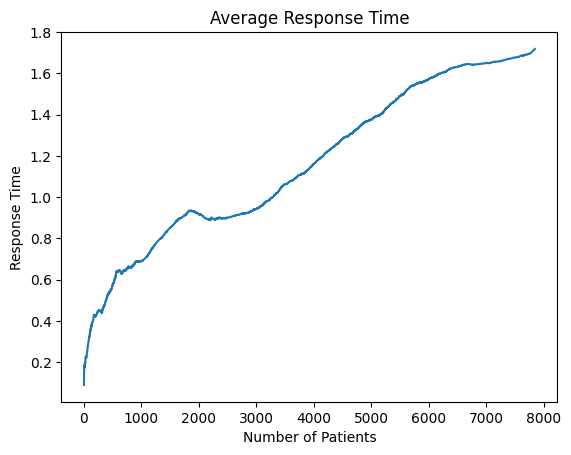

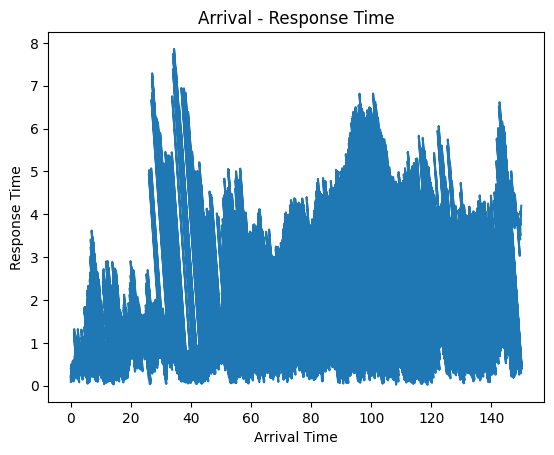

In [ ]:
import random
import simpy
import matplotlib.pyplot as pl

# ---------- Parameters ---------- #
time_scale = 1
total_patients = 8000
patients_processed = 0

patients_information = 0
patients_emergency = 0
patients_digest = 0
patients_neurology = 0
patients_injury = 0
patients_consultation = 0

# Average arrival rate (Lamda)
LAM = 53

# Average service rate per server


# Number servers
NUM_SERVER_information = 3

NUM_SERVER_digest = 3
NUM_SERVER_neurology = 2
NUM_SERVER_injury = 1

NUM_SERVER_emergency = 1

NUM_SERVER_consultation = 1

NUM_SERVER_pharmacy_payment = 3


# Check-In Information
MU1 = 24 * NUM_SERVER_information
# Examinaning at Designated Department: Digest, Neurology, Injury
MU2 = 9 * NUM_SERVER_digest
MU3 = 10 * NUM_SERVER_neurology
MU4 = 8 * NUM_SERVER_injury
# Getting in Emergency Rooms
MU5 = 3 * NUM_SERVER_emergency
# Receiving Consultation
MU6 = 4 * NUM_SERVER_consultation
# Taking Medicine and Paying Hospital fees
MU7 = 20 * NUM_SERVER_pharmacy_payment

# Starting Case: Normal and Emergency
Normal_Arrival = 0.95
Emergency_Arrival = 0.05
# Examinaning at Designated Department
Department_Digest = 0.45
Department_Neurology = 0.4
Department_Injury = 0.13
# Receiving Consultation
Consultation = 0.98
# Exiting
Information_Rooms_Exit = 1 - Department_Digest - Department_Neurology - Department_Injury
Emergency_Rooms_Exit = 1 - Consultation

def rtime(simulation_time):
    total_seconds = simulation_time * 3600
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f'{int(hours)}h:{int(minutes):02d}m:{int(seconds):02d}s'

# --------------------------------------------- vnb added/modified --------------------------------------------- #
# ------------- Analyzer ------------- #
class Analyzer:
    def __init__(self):
      # each patient's response time will be stored here in the rawData array
      self.rawData = np.array([])
      # average response time array
      self.averageArray = np.array([])

    def addPatient(self, response_time):
      # whenever a patient leaves the system, this function will be called to add system response time to him/her
      # to the rawData array and also calculate new average response time then push to the array
      self.rawData = np.append(self.rawData, response_time)
      self.averageArray = np.append(self.averageArray, np.mean(self.rawData))

    def getAverage(self):
      # return the newest average result
      # not being used now but declared to use later if needed
      return self.averageArray[len(self.averageArray) - 1]
# -------------------------------------#
# -------------------------------------------------------------------------------------------------------------- #

# ---------- Generate Servers ---------- #

class Service:
    def __init__(self, information, department, emergency, consultation, pharmacy_payment):
        self.information_server = information
        self.department_server = department
        self.emergency_server = emergency
        self.consultation_server = consultation
        self.pharmacy_payment_server = pharmacy_payment

class QueueBase:
    def __init__(self):
        self.resource = None

    def queue_length(self):
        length = len(self.resource.queue)
        is_processing = len(self.resource.users)
        return length, is_processing

class CheckIn_Server(QueueBase):
    def __init__(self, env, id, mu, number_of_service=1):
        super().__init__()
        self.id = id
        self.mu = mu / number_of_service
        self.resource = simpy.Resource(env, number_of_service)

    def doService(self, env, patient):
        machine_num = self.resource.count - 1
        service_time = np.random.exponential(1.0 / self.mu)
        #print(f"Patient {patient.id} has the time in information checking: {rtime(service_time)}, machine is processing: {machine_num}")
        patient.information_time = service_time + patient.information_time
        yield env.timeout(service_time)
        #print(f"Patient {patient.id} finish checking information: {rtime(env.now)}")

class Department_Server(QueueBase):
    def __init__(self, env, id, mu, number_of_service=1):
        super().__init__()
        self.id = id
        self.mu = mu / number_of_service
        self.resource = simpy.Resource(env, number_of_service)

    def doService(self, env, patient):
        machine_num = self.resource.count - 1
        service_time = np.random.exponential(1.0 / self.mu)
        #print(f"Patient {patient.id} has the time in designated department: {rtime(service_time)}, machine is processing: {machine_num}")
        patient.department_time = service_time + patient.department_time
        yield env.timeout(service_time)
        #print(f"Patient {patient.id} finish testing at designated department: {rtime(env.now)}")

class Emergency_Server(QueueBase):
    def __init__(self, env, id, mu, number_of_service=1):
        super().__init__()
        self.id = id
        self.mu = mu / number_of_service
        self.resource = simpy.Resource(env, number_of_service)

    def doService(self, env, patient):
        service_time = np.random.exponential(1.0 / self.mu)
        #print(f"Patient {patient.id} has the time in emergency area: {rtime(service_time)}")
        patient.emergency_time = service_time + patient.emergency_time
        yield env.timeout(service_time)
        #print(f"Patient {patient.id} finish first-aid service {self.id}: {rtime(env.now)}")

class Consultation_Server(QueueBase):
    def __init__(self, env, id, mu, number_of_service=1):
        super().__init__()
        self.id = id
        self.mu = mu / number_of_service
        self.resource = simpy.Resource(env, number_of_service)

    def doService(self, env, patient):
        service_time = np.random.exponential(1.0 / self.mu)
        #print(f"Patient {patient.id} has the time in consultation region: {rtime(service_time)}")
        patient.consultation_time = service_time + patient.consultation_time
        yield env.timeout(service_time)
        #print(f"Patient {patient.id} finish receiving consultation {self.id}: {rtime(env.now)}")

class Pharmacy_Payment_Server(QueueBase):
    def __init__(self, env, id, mu, number_of_service=1):
        super().__init__()
        self.id = id
        self.mu = mu / number_of_service
        self.resource = simpy.Resource(env, number_of_service)

    def doService(self, env, patient):
        machine_num = self.resource.count
        service_time = np.random.exponential(1.0 / self.mu)
        #print(f"Patient {patient.id} has the time in medicine and payment area: {rtime(service_time)}, machine is processing: {machine_num}")
        patient.pharmacy_payment_time = service_time + patient.pharmacy_payment_time
        yield env.timeout(service_time)
        #print(f"Patient {patient.id} finish take medicine and payment {self.id}: {rtime(env.now)}")

# ---------- Patient ---------- #
class Patient:
    global analyzer, totaltime_analyzer, arrivaltime_analyzer         # vnb added
    def __init__(self, id):
        self.id = id
        self.arrival_time = 0
        self.information_waiting_time = 0
        self.information_time = 0
        self.department_waiting_time = 0
        self.department_time = 0
        self.emergency_waiting_time = 0
        self.emergency_time = 0
        self.consultation_time = 0
        self.consultation_waiting_time = 0
        self.pharmacy_payment_waiting_time = 0
        self.pharmacy_payment_time = 0
        self.is_finished = False

    # vnb added
    def get_response_time(self):
        return (self.information_waiting_time
            + self.information_time
            + self.department_waiting_time
            + self.department_time
            + self.emergency_waiting_time
            + self.emergency_time
            + self.consultation_waiting_time
            + self.consultation_time
            + self.pharmacy_payment_waiting_time
            + self.pharmacy_payment_time)

    def get_arrival_time(self):
        return self.arrival_time

    def CheckIn_Server_Process(self, env, service, information_id):
        global job_env_pop, patients_processed, patients_digest, patients_neurology, patients_injury
        information_start_waiting_time = env.now
        #print(f"Patient {self.id} start waiting at information checking area at {rtime(information_start_waiting_time)}")

        with service.information_server[information_id].resource.request() as req:
            yield req
            self.information_waiting_time = (env.now - information_start_waiting_time + self.information_waiting_time)
            #print(f"Patient {self.id} WAIT {rtime(self.information_waiting_time)} to go to information checking area")
            yield env.process(service.information_server[information_id].doService(env, self))

            prob = np.random.uniform()
            prob = round(prob, 5)
            #print(f"Patient {self.id} probability: {prob}")

            job_env_pop.succeed()
            job_env_pop = env.event()

            if prob < Department_Digest:
                patients_digest += 1
                record.updatePatient(self, False, 1, 0)
                env.process(self.Department_Server_Process(env, service, 0))
            elif prob < Department_Digest + Department_Neurology:
                patients_neurology += 1
                record.updatePatient(self, False, 1, 1)
                env.process(self.Department_Server_Process(env, service, 1))
            elif prob < Department_Digest + Department_Neurology + Department_Injury:
                patients_injury += 1
                record.updatePatient(self, False, 1, 2)
                env.process(self.Department_Server_Process(env, service, 2))
            elif prob >= 1 - Information_Rooms_Exit:
                patients_processed += 1
                record.updatePatient(self, False, 1)
                #print(f"Patient {self.id} EXIT hospital at {rtime(env.now)}")


    def Department_Server_Process(self, env, service, department_id):
        global job_env_pop
        department_start_waiting_time = env.now
        #print(f"Patient {self.id} start waiting at designated department at {rtime(department_start_waiting_time)}")
        with service.department_server[department_id].resource.request() as req:
            yield req
            self.department_waiting_time = (env.now - department_start_waiting_time + self.department_waiting_time)
            department_id = service.department_server[department_id].id
            if department_id == 0:
              department_name  = "Digest"
            elif department_id == 1:
              department_name = "Neurology"
            else:
              department_name = "Injury"
            #print(f"Patient {self.id} WAIT {rtime(self.department_waiting_time)} to go to designated department {department_name} ")
            yield env.process(service.department_server[department_id].doService(env, self))

            job_env_pop.succeed()
            job_env_pop = env.event()

            record.updatePatient(self, False, 1)

            env.process(self.Medicine_Payment_Process(env, service, 0))

    def Emergency_Server_Process(self, env, service, emergency_id):
        global record, job_env_pop, patients_processed, patients_consultation
        emergency_start_waiting_time = env.now
        #print(f"Patient {self.id} start waiting at emergency area at {rtime(emergency_start_waiting_time)}")
        with service.emergency_server[emergency_id].resource.request() as req:
            yield req
            self.emergency_waiting_time = (env.now - emergency_start_waiting_time + self.emergency_waiting_time)
            #print(f"Patient {self.id} WAIT {rtime(self.emergency_waiting_time)} to go to emergency area")
            yield env.process(service.emergency_server[emergency_id].doService(env, self))

            prob = np.random.uniform()
            prob = round(prob, 5)
            #print(f"Patient {self.id} probability: {prob}")

            job_env_pop.succeed()
            job_env_pop = env.event()

            if prob < Consultation:
                patients_consultation += 1
                record.updatePatient(self, False, 1)
                env.process(self.Consultation_Server_Process(env, service, 0))
            elif prob >= 1 - Emergency_Rooms_Exit:
                patients_processed += 1
                record.updatePatient(self, False, 1)
                #print(f"Patient {self.id} EXIT hospital at {rtime(env.now)}")


    def Consultation_Server_Process(self, env, service, consultation_id):
        global job_env_pop
        consultation_start_waiting_time = env.now
        #print(f"Patient {self.id} start waiting at consultation region at {rtime(consultation_start_waiting_time)}")
        with service.consultation_server[consultation_id].resource.request() as req:
            yield req
            self.consultation_waiting_time = (env.now - consultation_start_waiting_time + self.consultation_waiting_time)
            #print(f"Patient {self.id} WAIT {rtime(self.consultation_waiting_time)} to go to consultation region")
            yield env.process(service.consultation_server[consultation_id].doService(env, self))

            job_env_pop.succeed()
            job_env_pop = env.event()

            record.updatePatient(self, False, 1)

            env.process(self.Medicine_Payment_Process(env, service, 0))

    def Medicine_Payment_Process(self, env, service, pharmacy_payment_id):
        global record, job_env_pop, patients_processed
        pharmacy_payment_start_waiting_time = env.now
        #print(f"Patient {self.id} start waiting at medicine and payment area - {pharmacy_payment_id} at {rtime(pharmacy_payment_start_waiting_time)}")
        with service.pharmacy_payment_server[pharmacy_payment_id].resource.request() as req:
            yield req
            self.pharmacy_payment_waiting_time = (env.now - pharmacy_payment_start_waiting_time + self.pharmacy_payment_waiting_time)
            #print(f"Patient {self.id} WAIT {rtime(self.pharmacy_payment_waiting_time)} to go to medicine and payment area")
            yield env.process(service.pharmacy_payment_server[pharmacy_payment_id].doService(env, self))

            #print(f"Patient {self.id} DONE at {rtime(env.now)}")
            patients_processed += 1
            job_env_pop.succeed()
            job_env_pop = env.event()
            record.updatePatient(self, True, 1)
            # vnb added
            analyzer.addPatient(record.response_time)
            arrivaltime_analyzer.addPatient(record.arrivaltime)
            # totaltime_analyzer.addPatient(record.totalTime)

# with the queue {service._server[_id].id}

# ---------- Patient Record ---------- #
class PatientRecords:
    def __init__(self):
        # --------------------- vnb added to draw table for simulation analysis ---------------------
        self.response_time = 0
        self.arrivaltime = 0

        self.average_patient_response_time = 0
        self.average_patient_waiting_time = 0

        self.average_information_waiting_time = 0
        self.average_digest_waiting_time = 0
        self.average_neurology_waiting_time = 0
        self.average_injury_waiting_time = 0
        self.average_emergency_waiting_time = 0
        self.average_consultation_waiting_time = 0
        self.average_pharmacy_payment_waiting_time = 0

        self.processing_time_information = 0
        self.processing_time_digest = 0
        self.processing_time_neurology = 0
        self.processing_time_injury = 0
        self.processing_time_emergency = 0
        self.processing_time_consultation = 0
        self.processing_time_pharmacy_payment = 0

        self.processing_speed_information = 0
        self.processing_speed_digest = 0
        self.processing_speed_neurology = 0
        self.processing_speed_injury = 0
        self.processing_speed_emergency = 0
        self.processing_speed_consultation = 0
        self.processing_speed_pharmacy_payment = 0

        self.utilization_information = 0
        self.utilization_digest = 0
        self.utilization_neurology = 0
        self.utilization_injury = 0
        self.utilization_emergency = 0
        self.utilization_consultation = 0
        self.utilization_pharmacy_payment = 0
        # -------------------------------------------------------------------------------------------

        self.success_rate_checkin = 0
        self.success_rate_emergency = 0
        self.exit_rate = 0

        # self.total_time = 0
        self.record_count = 0
        self.max_records = 10000
        self.arrival_time = np.empty(self.max_records, dtype=object)
        self.information_waiting_time = np.empty(self.max_records, dtype=object)
        self.information_time = np.empty(self.max_records, dtype=object)
        self.department_waiting_time = np.empty(self.max_records, dtype=object)
        self.department_time = np.empty(self.max_records, dtype=object)
        self.emergency_waiting_time = np.empty(self.max_records, dtype=object)
        self.emergency_time = np.empty(self.max_records, dtype=object)
        self.consultation_waiting_time = np.empty(self.max_records, dtype=object)
        self.consultation_time = np.empty(self.max_records, dtype=object)
        self.pharmacy_payment_waiting_time = np.empty(self.max_records, dtype=object)
        self.pharmacy_payment_time = np.empty(self.max_records, dtype=object)
        self.totalTime = np.empty(self.max_records, dtype=object)
        self.department_id = np.full(self.max_records, -1, dtype=int)
        self.is_finished = np.empty(self.max_records, dtype=bool)
        self.PatientRecords = np.empty(self.max_records, dtype=object)

    def updatePatient(self, patient: Patient, is_finished: bool, same_patient, department_id=-1):
        global total_patients, patients_processed
        self.PatientRecords = np.append(self.PatientRecords, patient)
        if same_patient == 0:
            self.record_count = self.record_count + 1
        self.arrival_time[patient.id] = patient.arrival_time
        self.information_waiting_time[patient.id] = patient.information_waiting_time
        self.information_time[patient.id] = patient.information_time
        self.department_waiting_time[patient.id] = patient.department_waiting_time
        self.department_time[patient.id] = patient.department_time
        self.emergency_waiting_time[patient.id] = patient.emergency_waiting_time
        self.emergency_time[patient.id] = patient.emergency_time
        self.consultation_waiting_time[patient.id] = patient.consultation_waiting_time
        self.consultation_time[patient.id] = patient.consultation_time
        self.pharmacy_payment_waiting_time[patient.id] = patient.pharmacy_payment_waiting_time
        self.pharmacy_payment_time[patient.id] = patient.pharmacy_payment_time
        self.totalTime[patient.id] = (
            patient.information_waiting_time
            + patient.information_time
            + patient.department_waiting_time
            + patient.department_time
            + patient.emergency_waiting_time
            + patient.emergency_time
            + patient.consultation_waiting_time
            + patient.consultation_time
            + patient.pharmacy_payment_waiting_time
            + patient.pharmacy_payment_time
        )
        if self.department_id[patient.id] == -1 and department_id != -1:
            self.department_id[patient.id] = department_id

        self.is_finished[patient.id] = is_finished
        self.PatientRecords[patient.id] = patient

        if patients_processed >= total_patients:
            print(f"Patients is processed: {patients_processed}")
        self.response_time = patient.get_response_time()    # vnb added
        self.arrivaltime = self.arrival_time[patient.id]      # vnb added

    def get_simulation_duration(self):
        start_time = self.arrival_time[1]

        completion_times = [(self.arrival_time[i] + self.totalTime[i]) for i in range(1, self.record_count + 1)]
        end_time = max(completion_times)

        simulation_duration = end_time - start_time

        print(f"Simulation Time: {rtime(simulation_duration)}")

        return simulation_duration

    def evaluate_simulation(self):
        global total_patients, patients_information, patients_emergency
        global patients_digest, patients_neurology, patients_injury, patients_consultation
        print(f"Information: {patients_information}, Emergency: {patients_emergency}")
        print(f"Digest: {patients_digest}, Neurology: {patients_neurology}, Injury: {patients_injury}")
        print(f"Emergency: {patients_emergency}, Consultation: {patients_consultation}")

        metrics = {}

        patients_pharmacy_payment = patients_digest + patients_neurology + patients_injury + patients_consultation

        self.average_patient_response_time = sum(i for i in self.totalTime[1:self.record_count + 1] if i) / total_patients
        metrics['Average Patient Response Time'] = rtime(self.average_patient_response_time)

        self.total_patient_waiting_time = sum(
            self.information_waiting_time[i] + self.department_waiting_time[i] + self.emergency_waiting_time[i] +
            self.consultation_waiting_time[i] + self.pharmacy_payment_waiting_time[i]
            for i in range(1, self.record_count + 1) if self.is_finished[i]
        )
        self.average_patient_waiting_time = self.total_patient_waiting_time / patients_pharmacy_payment
        metrics['Average Patient Waiting Time'] = rtime(self.average_patient_waiting_time)

        self.average_information_waiting_time = sum(
            i for i in self.information_waiting_time[1:self.record_count + 1] if i
        ) / patients_information
        metrics['Average Information Waiting Time'] = rtime(self.average_information_waiting_time)

        self.average_digest_waiting_time = sum(
            [self.department_waiting_time[i] for i in range(1, self.record_count + 1) if self.department_id[i] == 0]
        ) / patients_digest
        metrics['Average Digest Waiting Time'] = rtime(self.average_digest_waiting_time)

        self.average_neurology_waiting_time = sum(
            [self.department_waiting_time[i] for i in range(1, self.record_count + 1) if self.department_id[i] == 1]
        ) / patients_neurology
        metrics['Average Neurology Waiting Time'] = rtime(self.average_neurology_waiting_time)

        self.average_injury_waiting_time = sum(
            [self.department_waiting_time[i] for i in range(1, self.record_count + 1) if self.department_id[i] == 2]
        ) / patients_injury
        metrics['Average Injury Waiting Time'] = rtime(self.average_injury_waiting_time)

        self.average_emergency_waiting_time = sum(
            i for i in self.emergency_waiting_time[1:self.record_count + 1] if i
        ) / patients_emergency
        metrics['Average Emergency Waiting Time'] = rtime(self.average_emergency_waiting_time)

        self.average_consultation_waiting_time = sum(
            i for i in self.consultation_waiting_time[1:self.record_count + 1] if i
        ) / patients_consultation
        metrics['Average Consultation Waiting Time'] = rtime(self.average_consultation_waiting_time)

        self.average_pharmacy_payment_waiting_time = sum(
            i for i in self.pharmacy_payment_waiting_time[1:self.record_count + 1] if i
        ) / patients_pharmacy_payment
        metrics['Average Pharmacy Payment Waiting Time'] = rtime(self.average_pharmacy_payment_waiting_time)

        self.processing_time_information = sum(
            i for i in self.information_time[1:self.record_count + 1] if i
        ) / patients_information
        metrics['Processing Time Information'] = rtime(self.processing_time_information)

        self.processing_time_digest = sum(
            [self.department_time[i] for i in range(1, self.record_count + 1) if self.department_id[i] == 0]
        ) / patients_digest
        metrics['Processing Time Digest'] = rtime(self.processing_time_digest)

        self.processing_time_neurology = sum(
            [self.department_time[i] for i in range(1, self.record_count + 1) if self.department_id[i] == 1]
        ) / patients_neurology
        metrics['Processing Time Neurology'] = rtime(self.processing_time_neurology)

        self.processing_time_injury = sum(
            [self.department_time[i] for i in range(1, self.record_count + 1) if self.department_id[i] == 2]
        ) / patients_injury
        metrics['Processing Time Injury'] = rtime(self.processing_time_injury)

        self.processing_time_emergency = sum(
            i for i in self.emergency_time[1:self.record_count + 1] if i
        ) / patients_emergency
        metrics['Processing Time Emergency'] = rtime(self.processing_time_emergency)

        self.processing_time_consultation = sum(
            i for i in self.consultation_time[1:self.record_count + 1] if i
        ) / patients_consultation
        metrics['Processing Time Consultation'] = rtime(self.processing_time_consultation)

        self.processing_time_pharmacy_payment = sum(
            i for i in self.pharmacy_payment_time[1:self.record_count + 1] if i
        ) / patients_pharmacy_payment
        metrics['Processing Time Pharmacy Payment'] = rtime(self.processing_time_pharmacy_payment)

        metrics['Processing Speed Information'] = f"{round((1/self.processing_time_information))} patients/hour"
        metrics['Processing Speed Digest'] = f"{round((1 / self.processing_time_digest))} patients/hour"
        metrics['Processing Speed Neurology'] = f"{round((1 / self.processing_time_neurology))} patients/hour"
        metrics['Processing Speed Injury'] = f"{round((1 / self.processing_time_injury))} patients/hour"
        metrics['Processing Speed Emergency'] = f"{round((1 / self.processing_time_emergency))} patients/hour"
        metrics['Processing Speed Consultation'] = f"{round((1 / self.processing_time_consultation))} patients/hour"
        metrics['Processing Speed Pharmacy Payment'] = f"{round((1 / self.processing_time_pharmacy_payment))} patients/hour"

        self.processing_speed_information = 1/self.processing_time_information
        self.processing_speed_digest = 1/self.processing_time_digest
        self.processing_speed_neurology = 1/self.processing_time_neurology
        self.processing_speed_injury = 1/self.processing_time_injury
        self.processing_speed_emergency = 1/self.processing_time_emergency
        self.processing_speed_consultation = 1/self.processing_time_consultation
        self.processing_speed_pharmacy_payment = 1/self.processing_time_pharmacy_payment

        simulation_time = self.get_simulation_duration()

        self.utilization_information = (self.processing_time_information * patients_information
                                   / (NUM_SERVER_information * simulation_time))
        metrics['Utilization Information'] = f"{round(self.utilization_information * 100, 5)} %"

        self.utilization_digest = (self.processing_time_digest * patients_digest
                              / (NUM_SERVER_digest * simulation_time))
        metrics['Utilization Digest'] = f"{round(self.utilization_digest * 100, 5)} %"

        self.utilization_neurology = (self.processing_time_neurology * patients_neurology
                                 / (NUM_SERVER_neurology * simulation_time))
        metrics['Utilization Neurology'] = f"{round(self.utilization_neurology * 100, 5)} %"

        self.utilization_injury = (self.processing_time_injury * patients_injury
                              / (NUM_SERVER_injury * simulation_time))
        metrics['Utilization Injury'] = f"{round(self.utilization_injury * 100, 5)} %"

        self.utilization_emergency = (self.processing_time_emergency * patients_emergency
                                 / (NUM_SERVER_emergency * simulation_time))
        metrics['Utilization Emergency'] = f"{round(self.utilization_emergency * 100, 5)} %"

        self.utilization_consultation = (self.processing_time_consultation * patients_consultation
                                    / (NUM_SERVER_consultation * simulation_time))
        metrics['Utilization Consultation'] = f"{round(self.utilization_consultation * 100, 5)} %"

        self.utilization_pharmacy_payment = (self.processing_time_pharmacy_payment * patients_pharmacy_payment
                                        / (NUM_SERVER_pharmacy_payment * simulation_time))
        metrics['Utilization Pharmacy Payment'] = f"{round(self.utilization_pharmacy_payment * 100, 5)} %"

        self.success_rate_checkin = (patients_digest + patients_neurology + patients_injury) / patients_information
        metrics['Success Rate at CheckIn'] = f"{round(self.success_rate_checkin * 100, 5)}%"

        self.success_rate_emergency = patients_consultation / patients_emergency
        metrics['Success Rate at Emergency'] = f"{round(self.success_rate_emergency * 100, 5)}%"

        self.exit_rate = 1 - (patients_pharmacy_payment / total_patients)
        metrics['Exit Rate'] = f"{round(self.exit_rate * 100, 5)}%"

        metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
        return metrics_df

    def getAllRecord(self):
        records = []
        for i in range(1, self.record_count + 1):
            record = {
                'Patient ID': i,
                'Arrival Time': rtime(self.arrival_time[i]),
                'Information': rtime(self.information_time[i]),
                'Information Waiting': rtime(self.information_waiting_time[i]),
                'Department': rtime(self.department_time[i]),
                'Department Waiting': rtime(self.department_waiting_time[i]),
                'Emergency': rtime(self.emergency_time[i]),
                'Emergency Waiting': rtime(self.emergency_waiting_time[i]),
                'Consultation': rtime(self.consultation_time[i]),
                'Consultation Waiting': rtime(self.consultation_waiting_time[i]),
                'Medicine Payment': rtime(self.pharmacy_payment_time[i]),
                'Medicine Payment Waiting': rtime(self.pharmacy_payment_waiting_time[i]),
                'Total Time': rtime(self.totalTime[i]),
                'Is Finished': self.is_finished[i]
            }
            records.append(record)
        return records

    def getRecordFiltered(self):
        return [record for record in self.getAllRecord() if record['Is Finished']]

    def print_records(self):
        #print(f"Record Count: {self.record_count}")

        data1 = self.getAllRecord()
        data2 = self.getRecordFiltered()

        df1 = pd.DataFrame(data1)
        df2 = pd.DataFrame(data2)

        return df1, df2

# ---------- Patient Generator ---------- #
class Simulation:
    def __init__(self, env, service):
        self.service = service
        env.process(self.generatePatient(env))

    def generatePatient(self, env):
        global job_env_add, total_patients, patients_information, patients_emergency
        print("LAM:", str(LAM))
        i = 1
        while i <= total_patients:
            duration = random.expovariate(LAM / time_scale)
            yield env.timeout(duration)
            patient = Patient(i)
            patient.arrival_time = env.now
            job_env_add.succeed()
            job_env_add = env.event()
            record.updatePatient(patient, False, 0)
            #print(f"Patient {i} arrive at {rtime(patient.arrival_time)}")

            prob = np.random.uniform()
            prob = round(prob, 5)
            #print(f"Patient {i} probability: {prob}")

            queue_lengths, is_processing = service.information_server[0].queue_length()
            #print(f"QUEUE LENGTHS: {queue_lengths}, IS_PROCESSING: {is_processing}")
            queue_lengths_emergency, is_processing_emergency = service.emergency_server[0].queue_length()
            #print(f"QUEUE LENGTHS EMERGENCY: {queue_lengths_emergency}, IS_PROCESSING EMERGENCY: {is_processing_emergency}")

            if prob < Normal_Arrival:
                patients_information += 1
                env.process(patient.CheckIn_Server_Process(env, self.service, 0))
            else:
                patients_emergency += 1
                env.process(patient.Emergency_Server_Process(env, self.service, 0))

            i += 1

# ---------- Implement Simulation ---------- #
random.seed(99)
env = simpy.Environment()
job_env_add = env.event()
job_env_pop = env.event()
information = []
department = []
emergency = []
consultation = []
pharmacy_payment = []
analyzer = Analyzer()
# totaltime_analyzer = Analyzer()
arrivaltime_analyzer = Analyzer()

information.append(CheckIn_Server(env, 0, locals()[f"MU{1}"]/time_scale, NUM_SERVER_information))

department.append(Department_Server(env, 0, locals()[f"MU{2}"]/time_scale, NUM_SERVER_digest))
department.append(Department_Server(env, 1, locals()[f"MU{3}"]/time_scale, NUM_SERVER_neurology))
department.append(Department_Server(env, 2, locals()[f"MU{4}"]/time_scale, NUM_SERVER_injury))

emergency.append(Emergency_Server(env, 0, locals()[f"MU{5}"]/time_scale, NUM_SERVER_emergency))

consultation.append(Consultation_Server(env, 0, locals()[f"MU{6}"]/time_scale, NUM_SERVER_consultation))

pharmacy_payment.append(Pharmacy_Payment_Server(env, 0, locals()[f"MU{7}"]/time_scale, NUM_SERVER_pharmacy_payment))

service = Service(information, department, emergency, consultation, pharmacy_payment)
patient_generator = Simulation(env, service)
record = PatientRecords()
env.run()

record.evaluate_simulation()

df1, df2 = record.print_records()

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df1 = df1.to_string(index=False, justify='left')
df2 = df2.to_string(index=False, justify='left')

# print(f"All Record:")
# print(df1)

# print(f"\nRecord Filtered:")
# print(df2)

df3 = record.evaluate_simulation()
df3['Metric'] = df3['Metric'].apply(lambda x: f"{x:<50}")
df3['Value'] = df3['Value'].apply(lambda x: f"{x:<50}")
df3 = df3.to_string(index=False, justify='left')
print(f"Evaluate Simulation")
print(df3)

# --------------------------------------------- vnb added/modified --------------------------------------------- #
# Plot average response time
pl.plot(analyzer.averageArray)

# x and y axis labels
pl.xlabel('Number of Patients')
pl.ylabel('Response Time')

# Graph table
pl.title('Average Response Time')
pl.show()

pl.plot(arrivaltime_analyzer.rawData, analyzer.rawData)
# x and y axis labels
pl.xlabel('Arrival Time')
pl.ylabel('Response Time')

# Graph table
pl.title('Arrival - Response Time')
pl.show()
# ------------------------------------------------------------------------------------------------------------- #


# **Presenting results using tables**

In [ ]:
# vnb added tables for simulation analysis
import pandas as pd
from IPython.display import display, Markdown

# tuple to store values
queues = []

# ------------------------- Utilization presentation -------------------------
queue_name = "CHECK-IN"
queue_val = record.utilization_information
queues.append((queue_name, queue_val))

queue_name = "DIGEST"
queue_val = record.utilization_digest
queues.append((queue_name, queue_val))

queue_name = "NEUROLOGY"
queue_val = record.utilization_neurology
queues.append((queue_name, queue_val))

queue_name = "INJURY"
queue_val = record.utilization_injury
queues.append((queue_name, queue_val))

queue_name = "EMERGENCY"
queue_val = record.utilization_emergency
queues.append((queue_name, queue_val))

queue_name = "CONSULTATION"
queue_val = record.utilization_consultation
queues.append((queue_name, queue_val))

queue_name = "PHARMACY PAYMENT"
queue_val = record.utilization_pharmacy_payment
queues.append((queue_name, queue_val))

display(Markdown("## Utilization Results"))
utilization_selected = [(queue_name, queue_val) for queue_name, queue_val in queues]
df = pd.DataFrame(utilization_selected, columns = ["Queue Name", "Utilization"])
df = df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},  # Center align header
    ]
) .set_properties(subset=['Utilization'], **{'text-align': 'center'}) \
  .set_properties(subset=['Queue Name'], **{'text-align': 'left'})

display(df)
# ----------------------------------------------------------------------------


# -------------------- Average Waiting Time presentation ---------------------
queues = []

queue_name = "CHECK-IN"
queue_val = record.average_information_waiting_time
queues.append((queue_name, queue_val))

queue_name = "DIGEST"
queue_val = record.average_digest_waiting_time
queues.append((queue_name, queue_val))

queue_name = "NEUROLOGY"
queue_val = record.average_neurology_waiting_time
queues.append((queue_name, queue_val))

queue_name = "INJURY"
queue_val = record.average_injury_waiting_time
queues.append((queue_name, queue_val))

queue_name = "EMERGENCY"
queue_val = record.average_emergency_waiting_time
queues.append((queue_name, queue_val))

queue_name = "CONSULTATION"
queue_val = record.average_consultation_waiting_time
queues.append((queue_name, queue_val))

queue_name = "PHARMACY PAYMENT"
queue_val = record.average_pharmacy_payment_waiting_time
queues.append((queue_name, queue_val))

display(Markdown("## Average Waiting Time Results"))
waiting_time_selected = [(queue_name, queue_val) for queue_name, queue_val in queues]
df = pd.DataFrame(waiting_time_selected, columns = ["Queue Name", "Average Waiting Time"])
df = df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},  # Center align header
    ]
) .set_properties(subset=['Average Waiting Time'], **{'text-align': 'center'}) \
  .set_properties(subset=['Queue Name'], **{'text-align': 'left'})

display(df)
# -----------------------------------------------------------------------------



# ----------------------- Processing Time presentation ------------------------
queues = []

queue_name = "CHECK-IN"
queue_val = record.processing_time_information
queues.append((queue_name, queue_val))

queue_name = "DIGEST"
queue_val = record.processing_time_digest
queues.append((queue_name, queue_val))

queue_name = "NEUROLOGY"
queue_val = record.processing_time_neurology
queues.append((queue_name, queue_val))

queue_name = "INJURY"
queue_val = record.processing_time_injury
queues.append((queue_name, queue_val))

queue_name = "EMERGENCY"
queue_val = record.processing_time_emergency
queues.append((queue_name, queue_val))

queue_name = "CONSULTATION"
queue_val = record.processing_time_consultation
queues.append((queue_name, queue_val))

queue_name = "PHARMACY PAYMENT"
queue_val = record.processing_time_pharmacy_payment
queues.append((queue_name, queue_val))

display(Markdown("## Processing Time Results"))
processing_time_selected = [(queue_name, queue_val) for queue_name, queue_val in queues]
df = pd.DataFrame(processing_time_selected, columns = ["Queue Name", "Average Processing Time"])
df = df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},  # Center align header
    ]
) .set_properties(subset=['Average Processing Time'], **{'text-align': 'center'}) \
  .set_properties(subset=['Queue Name'], **{'text-align': 'left'})

display(df)
# ----------------------------------------------------------------------------


# ---------------------- Processing Speed presentation -----------------------
queues = []

queue_name = "CHECK-IN"
queue_val = record.processing_speed_information
queues.append((queue_name, queue_val))

queue_name = "DIGEST"
queue_val = record.processing_speed_digest
queues.append((queue_name, queue_val))

queue_name = "NEUROLOGY"
queue_val = record.processing_speed_neurology
queues.append((queue_name, queue_val))

queue_name = "INJURY"
queue_val = record.processing_speed_injury
queues.append((queue_name, queue_val))

queue_name = "EMERGENCY"
queue_val = record.processing_speed_emergency
queues.append((queue_name, queue_val))

queue_name = "CONSULTATION"
queue_val = record.processing_speed_consultation
queues.append((queue_name, queue_val))

queue_name = "PHARMACY PAYMENT"
queue_val = record.processing_speed_pharmacy_payment
queues.append((queue_name, queue_val))

display(Markdown("## Processing speed Results"))
processing_speed_selected = [(queue_name, queue_val) for queue_name, queue_val in queues]
df = pd.DataFrame(processing_speed_selected, columns = ["Queue Name", "Average Processing Speed"])
df = df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},  # Center align header
    ]
) .set_properties(subset=['Average Processing Speed'], **{'text-align': 'center'}) \
  .set_properties(subset=['Queue Name'], **{'text-align': 'left'})

display(df)
# -----------------------------------------------------------------------------

## Utilization Results

,Queue Name,Utilization
0,CHECK-IN,0.677555
1,DIGEST,0.820063
2,NEUROLOGY,0.980391
3,INJURY,0.822030
4,EMERGENCY,0.938414
5,CONSULTATION,0.693838
6,PHARMACY PAYMENT,0.846306


## Average Waiting Time Results

,Queue Name,Average Waiting Time
0,CHECK-IN,0.022496
1,DIGEST,0.204609
2,NEUROLOGY,2.701379
3,INJURY,0.789247
4,EMERGENCY,2.497402
5,CONSULTATION,0.343170
6,PHARMACY PAYMENT,0.095094


## Processing Time Results

,Queue Name,Average Processing Time
0,CHECK-IN,0.041346
1,DIGEST,0.111568
2,NEUROLOGY,0.100412
3,INJURY,0.124226
4,EMERGENCY,0.342772
5,CONSULTATION,0.257092
6,PHARMACY PAYMENT,0.049886


## Processing speed Results

,Queue Name,Average Processing Speed
0,CHECK-IN,24.186036
1,DIGEST,8.963109
2,NEUROLOGY,9.958940
3,INJURY,8.049859
4,EMERGENCY,2.917387
5,CONSULTATION,3.889657
6,PHARMACY PAYMENT,20.045639


# **Simulation Results and Analysis**

# **`Test Scenario 1: Urgent Case Ratio = 10%`**

`**a. Test case 1: external arrival rate λ = 15 patients/hour**` \
In the theory result calculation section, this test case's result showed us all beautiful output with the final analysis conclusion is the system operates in a steady state. Now we will run the system applying the input external arrival rate of 15 patients per hour and then compare the result with the one given in the theory-based calculation. \

\

*   **Average Patient Response and Waiting Time** \
![](https://imgur.com/M9CzPW4.png)

\

*   **Average Processing Time (at each internal node)** \
![](https://imgur.com/wu1ubbk.png)

\
*   **Average Processing Speed (at each internal node)** \
![](https://imgur.com/C6ckKj2.png)

\

*   **Average Waiting Time (at each internal node)** \
![](https://imgur.com/hROVJTF.png)

\

*   **Utilization** \
![](https://imgur.com/G1RV2UM.png)

\

*   **Sucess and Exit Rate** \
![](https://imgur.com/j5jQVhV.png)

\

Firstly, as we can easily observe that the utilization values here are all less than 1.0. Moreover, if we compare these values with its theory-based version above, they almost match each other. The biggest difference happens in the case of the **Neurology Department** with 4% difference (67.5% and 71.6831% in theory and simulation, respectively). To analyze the results more clearly, we plotted some graphs below: \

\

![](https://imgur.com/EDjL4Ak.png) \

\

In the early period, the transient state where the system's characteristics vary with time occurred. However, this is usual and only happens at the beginning of the simulation when the system's behavior depends on the initial conditions. After 3000 patients are transferred, we can see a steady state happening. Since this point in time, the system has performed in a steady state and its behavior no longer depends on time, so the result will not vary much. \

\

***Analysis Conclusion:*** The simulation-based results match the theory in this test case (λ = 15 patients/hour) where the system operates in a steady state. The average waiting and resonse time of a patient in the system are still fine with around only 42 minutes in resonse and 16 minutes in waiting time. The success and exit rates also match the routing probabilities to exit the system that we declared from the beginning (2%). \

\

`**Test case 2: external arrival rate λ = 20 patients/hour**` \

With this external arrival rate λ = 20 patients/hour, the theory-based result shows us a bottleneck at the **Emergency Care Process** node. Now, let's check if the simulation result shows us a similar result: \

\

*   **Average Patient Response and Waiting Time** \
![](https://imgur.com/SthsJDJ.png)

\
*   **Average Processing Time (at each internal node)** \
![](https://imgur.com/ss1wo97.png)

\
*   **Average Processing Speed (at each internal node)** \
![](https://imgur.com/8Dd1aKi.png)

\
*   **Average Waiting Time (at each internal node)** \
![](https://imgur.com/4mjHG8u.png)

\
*   **Utilization** \
![](https://imgur.com/ktOBwvj.png)

\
*   **Sucess and Exit Rate** \
![](https://imgur.com/hcoZwzC.png)

\


Before we go to the analysis part, we must state that in real life and in simulation, the utilization of a server can not exceed 1 as in theory. Just imagine what it means by "you utilize a person 140% of his or her ability"? It does not make sense! In fact, if the doctor's service rate is much lower than the arrival rate, a bottleneck must occur but at any cost, the doctor is always exploited maximum of 100%, he or she could not do more as in theory. Therefore, to determine when a bottleneck, our team chose a threshold of 98%, if the utilization exceeds 98%, we will consider this as a bottleneck. \

\

In the theory-based calculation, the utilization at the **Emergency Care Process** node reaches the value of 1.0 and in the simulation-based result, the utilization also nearly reaches 1.0 with the value of 0.993264. This matches almost 100% while other metrics also match to each other between theory and simulation. The highest difference is about 10% happening in the case of the **Neurology Department** node (0.9 and 0.800985 in theory and simulation, respectively). This is just simply because Python generated and assigned only 35% of the external arrival rate to this node but in theory, this must be 36%. However, the problem here is that the utilization shows us a value of 99% exceeding the threshold value we mentioned above. Therefore, this will be considered as the bottleneck as in the theory-based calculation. You can also see the average waiting time dramatically to 22.523856 (hours) while other node's average waiting time is only less than 1 hour. To analyze more clearly, our team also plots the graph below: \

\

![](https://imgur.com/YWdl4Pf.png) \

The average waiting time of the patient increases gradually until nearly the end, we observe a very sharp peak to the infinity. This means the response time will continue running to the infinity. As in the theory-based calculation, the proposed solution to solve this problem is to increase the number of servers at this node, however, to follow the behavior of increasing linearly in time of the average response time in simulation more clearly, we will show an additional test case in this section. This next additional test case did not appear in the theory, and we will not analyze much about it, we only want to show how an immensely sharp peak appears when there are many bottleneck points in this system. \

\

***Analysis Conclusion:*** Bottleneck starts occurring as in the theory-based Analysis Conclusion above. The average patient response and waiting time are much higher than the ones in the previous test case although we only increase the external arrival rate more 5 patients per hour. The success and exit rates still matched what we declared. Moreover, we also experimented by rerunning this test case many times and sometimes we got the result of a steady state in this test case. The reason is that λ = 20 patients per hour is the starting level that makes our system bottlenecked at the **Emergency Care Process** node with the utilization reaching 1.0. However, in fact, the simulation will randomize a number around 20 patients/hour, not exactly 20 patients every time, and also the routing probabilities from external to the **Emergency Care Process** node sometimes will not be exactly 10% as in the theory. Whenever the simulation result informs us the system is in the steady state, it is a hundred percent because the randomized number is less than the theoretical number. \

\

`**Test case 3: external arrival rate λ = 100 patients/hour**` \
After rerunning the system applying λ = 100 patients per hour, this is what we've got: \

\

* Average Waiting and Response Time in the system increases dramatically to around 105 hours. \
![](https://imgur.com/vZFBbSm.png)

* The plotted graph with average response time shows a linearly increasing line to infinity. \
![](https://imgur.com/A6DXte9.png) \

Now it is time for us to upgrade this system and check again as in test case 3 in the section of the theory above. \


***Analysis Conclusion:*** The average response time increases linearly to infinity, the system has a number of serious bottleneck points. \

\

`**Test case 4: external arrival rate λ = 25 patients/hour**` \

After running the system applying λ = 25 patients per hour with an upgrade of increasing 1 more server to the **Emergency Care Process** node, this is what we've got: \

\

*   **Average Patient Response and Waiting Time** \
![](https://imgur.com/CY0l324.png)

\
*   **Average Processing Time (at each internal node)** \
![](https://imgur.com/yqo7scf.png)

\
*   **Average Processing Speed (at each internal node)** \
![](https://imgur.com/2QLh3KR.png)

\
*   **Average Waiting Time (at each internal node)** \
![](https://imgur.com/Iut2ZFn.png)

\
*   **Utilization** \
![](https://imgur.com/35vYPYY.png)

\
*   **Sucess and Exit Rate** \
![](https://imgur.com/ucgNg2R.png)

\

After increasing the number of servers at the **Emergency Cre Process** node, the utilization at this node does not exceed the threshold of 98% anymore, instead, it drops down to only 53.9% but there is also a new bottleneck point at the **Neurology Department**. This matches the result we collected from the theory-based calculation above (external arrival rate λ = 25 patients per hour) with the updated configuration system:
* Bottleneck at the **Emergency Care Process** node has been solved.
* New bottleneck point at the **Neurology Department** node occurred.

In the next test case, we will increase the number of servers at the **Neurology Department** as what we did previously in the theory-based calculation section. However, now we will show you a the plotted graph with a sharp peak occurring at the end of the simulation: \

![](https://imgur.com/Xby4jF1.png) \

\


***Analysis Conclusion:*** The proposed method (increasing the number of servers at the bottleneck points) works well in case of simulation also. \

\

`**Test case 5: external arrival rate = 30 patients/hour**` \


The result after increasing the number of servers at the **Neurology Department** node will be shown below: \

\

*   **Average Patient Response and Waiting Time** \
![](https://imgur.com/2JfdzQW.png)

\
*   **Average Processing Time (at each internal node)** \
![](https://imgur.com/ZDls12B.png)

\
*   **Average Processing Speed (at each internal node)** \
![](https://imgur.com/tmqQZJG.png)

\
*   **Average Waiting Time (at each internal node)** \
![](https://imgur.com/FFMn6o5.png)

\
*   **Utilization** \
![](https://imgur.com/FmDCXhx.png)

\
*   **Sucess and Exit Rate** \
![](https://imgur.com/lyAh4Jz.png)

\
*   **Average Response Time over time graph** \
![](https://imgur.com/fsFHOSN.png) \

\

If we compare the utilization values from the theory and simulation, we can easily see a perfect match between them. The biggest difference is only 1.6% between theory-based and simulation-based at the **Neurology Department** node. Again, our proposed solution worked well to solve the bottleneck. If we look at the plotted graph of the average response time over time, we also observe a steady state in which the value does not vary much. \

\

**Analysis Conclusion:** All bottleneck points have been solved by increasing the number of servers at that specific point. The average patient response and waiting time still matched what we declared from the beginning. Absolutely, in case we increase the value of λ more and more, there will still be more bottleneck points. We can never avoid bottleneck points but at least our proposed method worked well to solve these problems.

# **`Test Scenario 2: Urgent Case Ratio = 5%`**

`**a. Test case 1: external arrival rate λ = 15 patients/hour**` \


*   **Average Patient Response and Waiting Time** \
![](https://imgur.com/Dv6JucE.png)

\

*   **Average Processing Time (at each internal node)** \
![](https://imgur.com/d92xLxe.png)

\
*   **Average Processing Speed (at each internal node)** \
![](https://imgur.com/lwLLlN0.png)

\

*   **Average Waiting Time (at each internal node)** \
![](https://imgur.com/r7k1EM1.png)

\

*   **Utilization** \
![](https://imgur.com/bEOPpVd.png)

\

*   **Sucess and Exit Rate** \
![](https://imgur.com/80kFg00.png)

\

For all the calculations performed above, it is clearly evident that the theoretical and simulated results align closely, confirming the system operates under steady-state conditions. Minor differences, such as utilization in the **Neurology Department** (71.25% in theory vs. 70.95% in simulation), can be attributed to the stochastic nature of the simulation, as random variables introduce slight variations in queue dynamics.

Consistency in success and exit rates demonstrates the accuracy of the simulation in implementing routing probabilities, with success rates at **98.23% (Check-In)** and **98.67% (Emergency)** and an exit rate of **1.75%**.

---
*   **Average Response Time over time graph** \
![](https://imgur.com/JEecZgT.png) \


## **Initial Transient Phase**
- In the first part of the graph (up to around **1,000 patients**), response time fluctuates significantly.
- This transient phase reflects the system's initial conditions, such as empty queues at the start of the simulation.
- Response time starts low (**~0.2 hours**) and spikes to **~0.6 hours** as patients enter the system and queues stabilize.


## **Steady-State Behavior**
- After **~1,000 patients**, response time stabilizes and fluctuates around **0.56 hours**, matching the system-wide average response time.
- This steady-state phase demonstrates normalized arrival and service processes, with no significant queue buildup.


## **Minimal Variations in Steady State**
- Between **1,000 and 8,000 patients**, average response time remains nearly constant, ranging between **0.55 and 0.6 hours**.
- These minimal variations highlight the system's robustness and ability to manage the specified patient load efficiently.

**⇒** The plot of Average Response Time vs. Number of Patients demonstrates that the system quickly reaches a steady state, with response times stabilizing over time. This behavior aligns with theoretical expectations, validating the system's design and configuration.

---

## **Analysis Conclusion**
The simulation results align closely with theoretical predictions, validating the model's accuracy for **λ=15**. Differences are minimal and consistent with expectations for a stochastic queuing system. Both theory and simulation confirm the system operates efficiently, demonstrating its ability to handle the given test scenario without significant bottlenecks.

---

`**b. Test case 2: external arrival rate λ = 25 patients/hour**` \
Coming up next is the value λ=25, where it causes a bottleneck in the Neurology department as expected in theoretical calculations. Let’s see what happens in the simulation results:
*   **Average Patient Response and Waiting Time** \
![](https://imgur.com/twah2iS.png)

\

*   **Average Processing Time (at each internal node)** \
![](https://imgur.com/K8xv10c.png)

\
*   **Average Processing Speed (at each internal node)** \
![](https://imgur.com/qSbsjqy.png)

\

*   **Average Waiting Time (at each internal node)** \
![](https://imgur.com/Q7MXbPM.png)

\

*   **Utilization** \
![](https://imgur.com/cGaUB1s.png)

\

*   **Sucess and Exit Rate** \
![](https://imgur.com/VUepiWh.png)

\
### **Utilization**
- **Theory:**
  - Neurology's utilization (ρ=1.18) exceeds capacity, causing an infinite waiting time.
- **Simulation:**
  - Neurology's utilization is capped at ρ=0.9988, ensuring finite delays but still creating a severe bottleneck (as explained earlier, this number touches the threshold in simulation).
  - Some other departments show up to 10% difference compared to theoretical predictions due to load redistribution (e.g., Digest: ρ=0.71 in theory vs. ρ=0.58 in simulation).

⇒ The simulation enforces practical constraints (ρ≤1), mitigating infinite delays and redistributing patients to less congested queues.

### **Waiting Time**
- **Theory:**
  - Infinite waiting time in Neurology due to ρ>1.
  - Moderate waiting times in other departments (e.g., Emergency: 0.845 hours).
- **Simulation:**
  - Neurology shows extremely high but finite waiting times (32.4 hours), contributing to the high average patient waiting time in the system.
  - Waiting times for other queues are slightly reduced due to redistributed load (e.g., Digest: 0.1096 hours).

⇒ Simulation caps queue size, avoiding infinite delays. Variability in patient routing reduces waiting times for non-bottlenecked queues.

### **Response Time**
- **Theory:**
  - Infinite response time in Neurology; other queues range from 0.1 to 1.33 hours.
- **Simulation:**
  - Neurology: W=32.65 hours (extremely high), contributing to the high average patient response time in the system.
  - Other queues: Lower-than-expected response times (e.g., Check-In: W=0.083 hours in simulation vs. W=0.1188 hours in theory).

⇒ Random variations in arrival patterns and patient routing in the simulation lead to slightly different loads across departments. This results in redistributed delays, where Neurology still experiences very high delays, but the load is not infinite as it is capped due to practical simulation constraints.

For Success rates: Check-In: 97.67%, Emergency: 97.94%, and Exit rate: 2.31% still match with the defined values in the system design. Small deviations reflect stochastic variability in patient routing and arrival patterns.

---
*   **Average Response Time over time graph** \
![](https://imgur.com/oicdy8o.png) \

## **Initial Transient Phase**
   - In the early phase (up to ~1,000 patients), response times increase sharply as queues begin to fill. During this transient state:
     - Response time starts low (~0.1 hours) and rises to around 4 hours.
     - The Neurology Department begins to dominate system delays as patient flows increase.


## **Linear Growth in Response Times:**
   - Beyond ~1,000 patients, the response time grows almost linearly due to Neurology nearing maximum capacity:
     - Neurology's high utilization (ρ≈0.9988) results in excessive delays, which propagate to other queues.
     - By ~8,000 patients, the system-wide average response time exceeds 12 hours.


## **Critical Impact of the Neurology Bottleneck:**
   - The steep increase in the graph demonstrates the Neurology Department's inability to handle the patient load, validating the theoretical prediction of a bottleneck.

⇒ The plot confirms the system's increasing instability under higher loads, emphasizing the importance of addressing the bottleneck in Neurology.

---

## **Analysis Conclusion**
The simulation results largely align with theoretical predictions but highlight critical differences due to practical constraints. Key findings include:

- **Neurology Bottleneck:** Simulated delays are extremely high but finite (W=32.4 hours), contrasting with the infinite delays predicted by theory. The bottleneck also affects the average patient response and waiting time throughout the system.
- **Load Redistribution:** Lower utilizations and waiting times in non-bottlenecked departments arise from the simulation's ability to cap queue sizes and adjust routing dynamically.
- **Graph Confirmation:** The linear growth in response times reflects Neurology’s saturation and its cascading impact on the system.

---

`**c. Test case 3: external arrival rate λ = 30 patients/hour**` \

By upgrading the design with the Neurology department to be M/M/3, we can address the bottleneck as predicted in the theory. Now we need to perform with the simulation to check whether it matches:
*   **Average Patient Response and Waiting Time** \
![](https://imgur.com/Ej3yD8U.png)

\

*   **Average Processing Time (at each internal node)** \
![](https://imgur.com/kfKC1TM.png)

\
*   **Average Processing Speed (at each internal node)** \
![](https://imgur.com/CtLJJpx.png)

\

*   **Average Waiting Time (at each internal node)** \
![](https://imgur.com/cGk55J1.png)

\

*   **Utilization** \
![](https://imgur.com/CnZcUeT.png)

\

*   **Sucess and Exit Rate** \
![](https://imgur.com/vXExN2i.png)

\
For all the calculations performed above, it is evident that the theoretical and simulated results align closely, confirming the system operates under steady-state conditions after upgrading the Neurology Department to M/M/3. Minor differences, such as utilization in the Digest Department (83.96% in theory vs. 84% in simulation), are due to the stochastic nature of the simulation, as random variables introduce slight variations in queue dynamics. Success and exit rates match closely with theory, with success rates at 98.11% (Check-In) and 97.14% (Emergency) and an exit rate of 1.94%.

---
*   **Average Response Time over time graph** \
![](https://imgur.com/eBTPdnK.png) \

#### **Initial Transient Phase**
In the first part of the graph (up to around 1,000 patients), response times fluctuate significantly due to transient conditions. Response time starts low (~0.2 hours) and spikes to ~1.4 hours as patients fill the system and queues stabilize.

#### **Steady-State Behavior**
After ~1,000 patients, response time stabilizes and fluctuates around 1.35 hours, aligning with the average patient response time. This demonstrates that the system handles the increased patient load effectively without significant delays.

#### **Minimal Variations in Steady State**
Between 1,000 and 8,000 patients, the average response time remains nearly constant, ranging between 1.3 and 1.4 hours. These minimal variations indicate the system's capacity to manage the increased patient load efficiently.

> The plot of Average Response Time vs. Number of Patients demonstrates the system's ability to reach a steady state and handle increased demand, with stabilized response times reflecting the theoretical predictions.

---

### **Analysis Conclusion**

The simulation results closely align with theoretical predictions, validating the model's accuracy for λ=30. Differences are minor and align with expectations for a stochastic queuing system. Both theory and simulation confirm that the Neurology Department upgrade mitigates the bottleneck, allowing the system to handle the given load efficiently.


# **6. Design Update**
After reviewing the designs of other groups and our own, we see that the design needs to be updated to meet the real situation. In fact, with the initial system parameter that we used to set up the system for simulation, it is effortless for this system to have a bottleneck due to the low service rate. In the original system, we consider each doctor as a server, but it is not reasonable if we only have 1, 2, and 3 doctors for a specific department. Instead, now we consider a server as a room and inside this room, there will be many doctors/staffs to serve the patients. Therefore, the service rates for each server at each node will be changed as below:

*   **$μ_{digest}$ = 9 patients/hour**
*   **$μ_{neurology}$ = 10 patients/hour**
*   **$μ_{injury}$ = 24 patients/hour**
*   **$μ_{emergency}$ = 6 patients/hour**
*   **$μ_{consultation}$ = 6 patients/hour**
*   **$μ_{check-in}$ = 24 patients/hour**
*   **$μ_{pharma-payment}$ = 20 patients/hour**

\

Besides considering bottleneck points in the design, we should also care about the utilization at each internal nodes. Therefore, we will run some more test cases for both 2 test scenarios:


*   **Scenario 1: Urgent Ratio = 10%**
*   **Scenario 2: Urgent Ratio = 5%**



# **Test Scenario 1: Urgent Ratio = 10%**

**`a. Test case 1: external arrival rate λ = 56 patients/hour`** \


*   Theory-based result \
![](https://imgur.com/O359hLY.png)

*   Simulation-based result \
![](https://imgur.com/gClpcFK.png)

\

As you can see the results of utilization from both theory and simulation match each other. The utilization in theory at the neurology department node indicates a bottleneck point and the simulation also shows us a 99.4706%, which is also considered a bottleneck. However, we will not explain much more about the bottleneck here because it has been discussed and solved above. Now, we will take a look at the Injury Department's utilization, which is only 27.3% and 24.8223% in theory and simulation, respectively. This is not a good value because this indicates a huge waste of human resources. Therefore, we need to modify this value one more time. The value of **$μ_{injury}$** now drops to 8 patients/hour.

\

**`b. Test case 2: external arrival rate λ = 56 patients/hour with μ_injury = 8 patients/hour`** \
Because the utilization at this internal node is quite low. We decided to transfer some doctors to other branches to help share workload for them. Therefore, the service rate of each room now drops to only 8 patients/hour. The utilization of the system now become:

*   Theory-based result \
![](https://imgur.com/JiXAZkO.png)

*   Simulation-based result \
![](https://imgur.com/j54O8ZL.png)

Now the utilization at the Injury Department node becomes around 80% as you can see. Other utilization values of other nodes are also good except for the case of neurology and as we mentioned, with this case, we need to improve the system by increasing number of servers to adapt the new workload. However, we did this in the above section, so we will not do it again here.

---

# **Test Scenario 2: Urgent Ratio = 5%**
**`a. Test case 1: external arrival rate λ = 53 patients/hour`** \


*   Theory-based result \
![](https://imgur.com/g7pnDEm.png)

*   Simulation-based result \
![](https://imgur.com/Vmx1S0C.png)

\
### **Utilization**
- **The Neurology Department** shows nearly full utilization in both theoretical (1.007) and simulation (0.998), indicating a **bottleneck**.
- **The Injury Department** is under-utilized with values of 0.273 (theory) and 0.255 (simulation), reflecting **inefficient resource allocation**.
- Other departments (e.g., Digest, Check-In, Pharmacy & Payment) have reasonable utilizations around 0.7–0.8, suggesting they are well-balanced.

### **Design Implication**
- The bottleneck at the Neurology Department requires further optimization by increasing the number of servers as proposed in the earlier analysis.
- Low utilization at the Injury Department, along with Emergency and Consultation Departments, suggest reallocation of staff or resources is needed to avoid wastage and increase the system performance.


### **Analysis Conclusion**
Overall, the theoretical model closely predicts simulation performance, validating the updated design under this scenario. The system operates under steady-state conditions but struggles with a bottleneck at the Neurology Department, necessitating an increase in capacity. Meanwhile, under-utilized resources at the Injury, Emergency, Consultation Department point to inefficiencies that should be addressed for better system balance.

We will redirect some doctors to other departments in order to optimize the system, so the service rate in Injury, Emergency, Consultation Department should be changed as follows:

- **$μ_{injury}$    = 8 patients/hour**
- **$μ_{emergency}$ = 3 patients/hour**
- **$μ_{consultation}$ = 4 patients/hour**

---
**`b. Test case 2: external arrival rate λ = 53 patients/hour with μ_injury = 8 patients/hour, μ_emergency = 3 patients/hour, μ_consultation = 4 patients/hour`** \

*   Theory-based result \
![](https://imgur.com/V0QSaKO.png)

*   Simulation-based result \
![](https://imgur.com/fAWx8Ff.png)

- After reducing the service rates of the Injury Department, Urgent Care Consultation, and Emergency Care Process, the utilization across all departments has balanced significantly. The updated design ensures no excessive underutilization or overutilization, with all departments falling within a well-utilized range (0.7-0.85), except for the Neurology Department (slightly high at ~99.5%). This indicates a more efficient allocation of resources while maintaining system stability and addressing bottlenecks effectively. Further monitoring may be required to fine-tune the Neurology Department if its utilization consistently approaches 1.



# **7. Design Superior Aspects and Limitations**

### Efficient Handling of Variable Patient Load:
- The design demonstrates robustness in handling a wide range of patient arrival rates, from moderate to high volumes (e.g., $\lambda=15$ to $\lambda=30$). By appropriately tuning the number of servers and service rates at bottleneck departments like Neurology, the system effectively minimizes waiting times and response times under steady-state conditions.
- The modifications, such as increasing the Neurology department from M/M/2 to M/M/3, successfully resolved critical bottlenecks and distributed patient loads across the system.

---

## Limitations of the Design

### 1. High Dependency on Service Rate Tuning:
- The system's performance heavily depends on manually adjusted service rates and server allocations. For instance, small misestimations in service capacity (e.g., underestimating Neurology's demand) can lead to severe bottlenecks, long queues, and increased waiting times. This makes the design less adaptable to real-time changes in patient arrival patterns.

### 2. Underutilization in Certain Departments:
- Despite optimization, some departments, such as Urgent Care Consultation, consistently showed underutilization. This indicates resource inefficiency and potential wastage in these areas.

### 3. Limited Scalability:
- While the current design can manage a set range of patient loads, it shows constraints when faced with larger arrival rates or significant variability. For example, the Neurology department consistently operates near full capacity, making it vulnerable to overloading if arrival rates increase further.


# **8. Conclusion**
This assignment explored the design, testing, and optimization of a queueing system tailored for a healthcare setting. Through detailed theoretical calculations and simulation analysis, we investigated the system's performance under various scenarios, highlighting its strengths and limitations.

The design effectively balances patient load and service rates across departments, with key adjustments like increasing server capacity in bottleneck areas (e.g., Emergency, Neurology department) to ensure smooth operations. The implementation of M/M/c queueing models allowed us to test the system's scalability and robustness under varying patient arrival rates, from λ=15 to λ=30. Simulation results validated the theoretical predictions, showcasing the system's ability to handle real-world stochastic variability while maintaining steady-state conditions.

However, our analysis also revealed some limitations in the design. Specific departments were consistently underutilized, indicating resource inefficiencies. Moreover, the system relies heavily on manual tuning of service rates, which may not adapt well to sudden changes in patient flows. These findings underscore the need for a more dynamic system capable of real-time optimization to meet varying demands.

Despite these challenges, the project demonstrates the importance of modeling and simulation in designing efficient queueing systems. By systematically analyzing utilization, waiting times, response times, and patient flow, we were able to identify bottlenecks and implement targeted solutions. The final design, while not without its limitations, provides a solid foundation for managing patient queues effectively in a controlled environment.


This assignment offered valuable insights into the practical application of queueing theory in real-world scenarios. It highlighted the critical role of system design, testing, and optimization in ensuring efficiency and patient satisfaction. The iterative approach to refining the design — from identifying bottlenecks to testing and implementing solutions — mirrors the process of continuous improvement required in real-world operations.


Looking ahead, further improvements could focus on automating resource allocation based on real-time data, incorporating more complex arrival and service time distributions, and evaluating patient satisfaction metrics. These enhancements would make the system more adaptive and scalable, ensuring its viability in dynamic healthcare environments.

In conclusion, this assignment has provided a comprehensive understanding of how theoretical models and simulations can be combined to design and optimize queueing systems. The lessons learned here will undoubtedly inform future efforts to create more efficient and responsive systems in various domains.
